## Cellular Automata Traffic- MOTORWAY MADNESS II - Logbook 2  ##

### Dual Lane System ###

In [2]:
import numpy as np                                  #imports
import matplotlib.pyplot as plt

### 19/2 ###
Firstly we will create a road being a 2D matrix of zeros, starting with 2 lanes. To make the array slicing easier for the overtaking we will work with the 0th and 1st indexes as two different arrays- leftlane and rightlane, and then bring them back together at the end before impleneting the 4 rule CA used for a single lane. <br/>
<br/>
The overtaking should be build upon the two main rules: <br/>
• An incentive: the driver anticipates being able to drive more freely on the new lane <br/>
• Safety: not forcing other drivers to brake too hard. <br/>
<br/> 
Looking at the first rule the car must ensure that there is motivation to overtake: <br/>
• if there is a car in front that is a distance in front, smaller than the distance the car would travel in the next time step and would cause the car to slow down. <br/>
• the car that is in front is traveling slower than the car looking to overtake. <br/>
• if there is no car in the space it is looking to move into. <br/>
• if there is no car in the other lane that is a distance in front, smaller than the distance the car would travel in the next time step and would cause the car to slow down. <br/>
<br/>
Looking at the second rule: <br/>
• As stated in the first rule, the car overtaking shouldn't overtake if it will then have to slow down. <br/>
• Any cars in the lane it is moving into should not have to slow down to accomodate the overtaking car. <br/>
 <br/>
After running the programme a few times only looking at overtaking all seemed to work as planned, so moving on to cars looking to move from the overtaking lane if they are not looking to overtake the cars in the left lane, as well as ensuring it is safe for them to do so. <br/>
There must be space in the left lane for the car that will move into. The space it will move into and spaces in front distance = speed of car (1 timestep) must be empty, or the cars in front must be moving faster than the vehicle moving into the lane.



In [ ]:
n= 24
vmax = 6
density = 0.15

dualroad = np.zeros((2, n))    
  
### Car Generation ###
for j in range(2):
    for i in range(round(n*density)):
        ranspace = np.random.randint(0, n)
        while dualroad[j,ranspace]!=0:
            ranspace = np.random.randint(0, n)
        dualroad[j, ranspace]=np.random.randint(2, vmax) 
        
print(dualroad)

leftlane = dualroad[0,]
rightlane = dualroad[1,]

for i in range(n-vmax-2,  -1, -1):
    
    ### overtaking ###
    
    #cars in the left lane:
    if leftlane[i]>1:
        #space in the other lane for it to move forward into
        if rightlane[i]==0:
            # are there cars in front?
            count = 0    #Count is the distance between two cars.
            while leftlane[i + count+1]<1 and count<vmax:
                count+=1
            #if the velocity of the car is greater than the distance between
            if  leftlane[i]>count: 
                #if the speed of the car is greater than the car ahead
                if leftlane[i]>leftlane[i + count+1]: 
                    #ensure we stay within index- this will not matter when we move to periodic system
                    if i-vmax>0:
                        #ensuring the car behind in the other lane wont have to slow down
                        count2 = 0 
                        while rightlane[i - count2-1]<1 and count2<vmax:
                            count2+=1
                        #if the speed (1 timestep) of car behind is smaller than the distance
                        if rightlane[[i - count2-1]]<count:

                            #ensuring the car won't have to slow down in the other lane
                            count3 = 0 
                            while rightlane[i + count3+1]<1 and count3<=vmax:
                                count3+=1
                            #no cars infront at distance equivalent to that will be travelled in one time step.
                            if  leftlane[i]<count3:
                                #move into the other lane
                                rightlane[i]=leftlane[i]
                                leftlane[i]=0

                            #if the cars that are in front are faster or equal
                            elif leftlane[i]=<rightlane[i + count3+1]:

                                #move into the other lane
                                rightlane[i]=leftlane[i]
                                leftlane[i]=0

    ### moving to the slower lane ###
    
    #cars in the left lane:
    if rightlane[i]>1:
        #space in the other lane for it to move forward into
        if leftlane[i]==0:
            
            #if cars in the other lane ahead are traveling at the same speed or faster
            count4=0 
            while leftlane[i + count4+1]<1 and count4<=vmax:
                count4+=1
            #no cars in that space
            if  rightlane[i]<=count4:
                    
                #move into the other lane
                leftlane[i]=rightlane[i]
                rightlane[i]=0
                    
            #the car is traveling slower or equal than the cars in the space  
            elif rightlane[i]<=leftlane[i + count4+1]:
                    
                #move into the other lane
                leftlane[i]=rightlane[i]
                rightlane[i]=0
        
    
dualroad[0,] = leftlane 
dualroad[1,] = rightlane 
print(dualroad)

### 20/2###
Then came the task of intergrating the code for the lane changing rules into the CA for the speeds of the cars.<br/>
<br/>
This line, for collecting the average velocities was not working so for now I have commented it out:<br/>
<br/>
data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)<br/>
<br/>
I did look to implement this rule:
<br/>
    #the car is traveling slower or equal than the cars in the space <br/>
    elif rightlane[i]<=leftlane[i + count4+1]: <br/>
        #move into the other lane <br/>
        leftlane = np.delete(leftlane, i) <br/>
        speed = rightlane[i] <br/>
        
        leftlane = np.insert(leftlane, i, speed)   <br/>                                                                            
        rightlane = np.delete(rightlane, i) <br/>
        rightlane = np.insert(rightlane, i, 0) <br/>
<br/>
However the cars would move behind another car, and despite this car moving faster, as rule 2 indicates that the distane then dictates the speed of the car, it would slow down and be less benifical for it to move into that lane.

In [ ]:
def dual_lane_road_periodic_nums(n, div, vmax, density, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    dualroad = np.zeros((2,n))                         
    matrix = np.zeros((3*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    iterations = 1
    
    ### Car Generation ###
    for j in range(2):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while dualroad[j,ranspace]!=0:
                ranspace = np.random.randint(0, n)
            dualroad[j, ranspace]=np.random.randint(2, vmax) 
  
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        leftlane = np.concatenate((dualroad[0,], dualroad[0,]))
        rightlane = np.concatenate((dualroad[1,], dualroad[1,]))


        for i in range(n-vmax,  -1, -1):
    
            ### Overtaking ###
    
            #cars in the left lane:
            if leftlane[i]>1:
                #space in the other lane for it to move forward into
                if rightlane[i]==0:
                    # are there cars in front?
                    count = 0    #Count is the distance between two cars.
                    while leftlane[i + count+1]<1 and count<vmax:
                        count+=1
                    #if the velocity of the car is greater than the distance between
                    if  leftlane[i]>count: 
                        #if the speed of the car is greater than the car ahead
                        if leftlane[i]>leftlane[i + count+1]: 
                            #ensure we stay within index- this will not matter when we move to periodic system
                            if i-vmax>0:
                                #ensuring the car behind in the other lane wont have to slow down
                                count2 = 0 
                                while rightlane[i - count2 - 1]<1 and count2<vmax:
                                    count2+=1
                                #if the speed (1 timestep) of car behind is smaller than the distance
                                if rightlane[[i - count2-1]]<count:

                                    #ensuring the car won't have to slow down in the other lane
                                    count3 = 0 
                                    while rightlane[i + count3+1]<1 and count3<=vmax:
                                        count3+=1
                                    #no cars infront at distance equivalent to that will be travelled in one time step.
                                    if  leftlane[i]<count3:
                                        #move into the other lane
                                        rightlane = np.delete(rightlane, i)
                                        rightlane = np.insert(rightlane, i, int(leftlane[i]))

                                        leftlane = np.delete(leftlane, i)
                                        leftlane = np.insert(leftlane, i, 0)

                                    #if the cars that are in front are faster
                                    elif leftlane[i]<rightlane[i + count3+1]:

                                        #move into the other lane
                                        rightlane = np.delete(rightlane, i)
                                        rightlane = np.insert(rightlane, i, int(leftlane[i]))

                                        leftlane = np.delete(leftlane, i)
                                        leftlane = np.insert(leftlane, i, 0)
    
            ### Moving to the slower lane ###
    
            #cars in the left lane:
            if rightlane[i]>1:
                #space in the other lane for it to move forward into
                if leftlane[i]==0:
            
                    #if cars in the other lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1]<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i]<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        speed = rightlane[i]
                        leftlane = np.insert(leftlane, i, speed)                                          
                                                                  
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down
                    elif 2*rightlane[i]<=leftlane[i + count4+1]:

                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, rightlane[i])                                          
                                             
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                    
        
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        dualroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        dualroad[1,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))
        
        for j in range(2):
            ##create loop like extention to the end of the road
            road = np.concatenate((dualroad[j,], dualroad[j,]))
                  
            ### Rule 1 ###
        
            # If the velocity v of the car is lower than vmax , and the distance to the next car
            # ahead is larger than v + 1, the speed is increased by one.
            for i in range(2*n-6,  -1, -1):
                if road[i]>1:                               
                    if sum(road[i+1:i+int(road[i])])==0:
                        if road[i]<vmax:
                            road[i]+=1
            
            
                    ### Rule 2###
                
                    # If a driver at site i sees the next vehicle at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        while road[i + count5]<1:
                            #Count is the distance between two cars.
                            count5+=1 
                        road[i]=count5   
                            
       
            ### Rule 4 ###
        
            # Each vehicle is advanced by v sites.
                #Special case where car is stationary.
                elif road[i]==1:                              
                    #If no cars in front, start moving at v=1.
                    if road[i+1]!=1:                
                        road[i]=2
                    else:
                        road[i]=1
        
        
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-6, -1, -1):    
            
                #cars move forward 
                if road[i]>0:                       
                    road= np.insert(road, i+int(road[i])-1, int(road[i]))       
                    road = np.delete(road, i)
                
        
            #reduce the road back to the original shape
            dualroad[j,] = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))
        
            ###Rule 3 ###
                
            # The velocity of each moving vehicle is decreased by one with probability p.
            for i in range(n):
                if np.random.randint(1, 100)<prob_car_daw*100:       
                    if dualroad[j, i]>1:                                     
                        dualroad[j, i]-=1
                        
                        
       
        #Visualisation
        for j in range(2):
            for i in range(n):
                if dualroad[j, i]==0:
                    matrix[3*(iterations-1) +j,i]= 20
                else:
                    matrix[3*(iterations-1) +j,i]= 30
        
       ### Alternate visualiation tools ###
            street = []
            for i in range(n):
                if dualroad[j,i]==0:
                    street.append(' ')
                else:
                    street.append(dualroad[j,i]-1)
            print(iterations, street)
        
            
            ### Data collection ###
        
            data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)
 
        
        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)
        
        print("")
        
        ###next time step ###
        iterations +=1

    ### Display Road ###
    #fig11 = plt.figure(figsize=(50,100))
    #ax11 = fig11.add_subplot(111)
    #ax11.set_xlabel('Length Along Road')
    #ax11.set_ylabel('3 x Time step')
    #ax11.set_title("Visual Repsresentation of One Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    #ax11.imshow (matrix) 
    


In [ ]:
dual_lane_road_periodic_nums(30, 2, 6, 12/100,2/100, 10)

Looking at the numerical output all seems to work accoridngly, so i was than able to move move to the matrix visualistion.<br/>
<br/>
Howevever I could see that the rule 2 of the CA was overcomplicated and would not allow cars to be bumper to bumber so the value of count starts at 1, and increases with each step. This also reduces the need for the if else statement that governed whether a car was directly behind another car as if that is the case now, the velocity becomes the inital value of count = 1, which represents a staionary car.


In [3]:
def dual_lane_road_periodic(n, div, vmax, density, prob_car_daw, max_iterations):
    ''' Function to generate a road and while cars are generated and move according to a set of rules.
        Inputs:
        n = length of the road
        div = rate of new cars joining the road
        vmax = max speed of the cars
        density = density of cars on the road
        prob_car_daw = probability of the cars dawdeling 
        max_iterations = number of timesteps
    ''' 
    
    #Create empty road and matrix to store iterations
    dualroad = np.zeros((2,n))                         
    matrix = np.zeros((3*(max_iterations-1) -1 , n))
    data= np.zeros((2*max_iterations, 2))
    iterations = 1
    
    ### Car Generation ###
    for j in range(2):
        for i in range(round(n*density)):
            ranspace = np.random.randint(0, n)
            while dualroad[j,ranspace]!=0:
                ranspace = np.random.randint(0, n)
            dualroad[j, ranspace]=np.random.randint(2, vmax) 
  
    while iterations in range(max_iterations):
        
        #create loop like extention to the end of the road
        leftlane = np.concatenate((dualroad[0,], dualroad[0,]))
        rightlane = np.concatenate((dualroad[1,], dualroad[1,]))


        for i in range(n-vmax,  -1, -1):
    
            ### Overtaking ###
    
            #cars in the left lane:
            if leftlane[i]>1:
                #space in the other lane for it to move forward into
                if rightlane[i]==0:
                    #is it worth overtaking, the cars ahead:
                    count = 0    #Count is the distance between two cars.
                    while leftlane[i + count+1]<1 and count<vmax:
                        count+=1
                    #if the velocity of the car is greater than the distance between
                    if  leftlane[i]>count: 
                        #if the speed of the car is greater than the car ahead
                        if leftlane[i]>leftlane[i + count+1]: 
                            #ensure we stay within index- this will not matter when we move to periodic system
                            if i-vmax>0:
                                #ensuring the car behind in the other lane wont have to slow down
                                count2 = 0 
                                while rightlane[i - count2 - 1]<1 and count2<vmax:
                                    count2+=1
                                #if the speed (1 timestep) of car behind is smaller than the distance
                                if rightlane[[i - count2-1]]<count + leftlane[i]:

                                    #ensuring the car won't have to slow down in the other lane
                                    count3 = 0 
                                    while rightlane[i + count3+1]<1 and count3<=vmax:
                                        count3+=1
                                    #no cars infront at distance equivalent to that will be travelled in one time step.
                                    if  leftlane[i]<count3:
                                        #move into the other lane
                                        rightlane = np.delete(rightlane, i)
                                        rightlane = np.insert(rightlane, i, leftlane[i])

                                        leftlane = np.delete(leftlane, i)
                                        leftlane = np.insert(leftlane, i, 0)

                                    #if the cars that are in front are faster
                                    elif leftlane[i]<rightlane[i + count3+1]:

                                        #move into the other lane
                                        rightlane = np.delete(rightlane, i)
                                        rightlane = np.insert(rightlane, i, leftlane[i])

                                        leftlane = np.delete(leftlane, i)
                                        leftlane = np.insert(leftlane, i, 0)

            ### Moving to the slower lane ###
    
            #cars in the left lane:
            if rightlane[i]>1:
                #space in the other lane for it to move forward into
                if leftlane[i]==0:
            
                    #if cars in the other lane ahead are traveling at the same speed or faster
                    count4=0 
                    while leftlane[i + count4+1]<1 and count4<=vmax:
                        count4+=1
                    #no cars in that space
                    if  rightlane[i]<=count4:
                    
                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, rightlane[i])                                          
                                                                  
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
                        
                    #the car is traveling slower or equal than the cars in the space 
                    #and will have the distance between to not have to slow down
                    elif rightlane[i]<=leftlane[i + count4+1]:

                        #move into the other lane
                        leftlane = np.delete(leftlane, i)
                        leftlane = np.insert(leftlane, i, rightlane[i])                                          
                                             
                        rightlane = np.delete(rightlane, i)
                        rightlane = np.insert(rightlane, i, 0)
        
        #reducing each lane to its oringial size and back into the one road containing each lane.
        #It was important to double the size of the road so that the objects we are taking into consideration when 
        #checking cars forward and behind, dont exceed the limits of the array
        dualroad[0,] = np.concatenate((leftlane[n:n+int(n/2)], leftlane[int(n/2):n]))
        dualroad[1,] = np.concatenate((rightlane[n:n+int(n/2)], rightlane[int(n/2):n]))
        
        for j in range(2):
            ##create loop like extention to the end of the road
            road = np.concatenate((dualroad[j,], dualroad[j,]))
            
            ### Rule 1 ###
        
            # If the velocity v of the car is lower than vmax , and the distance to the next car
            # ahead is larger than v + 1, the speed is increased by one.
            for i in range(2*n-6,  -1, -1):
                if road[i]>1:                               
                    if sum(road[i+1:i+int(road[i])])==0:
                        if road[i]<vmax:
                            road[i]+=1
            
            
                    ### Rule 2###
                
                    # If a driver at site i sees the next vehicle at site i+j, with j < v, 
                    # they reduce speed to j −1.  
                    else:
                        count5 = 1
                        #If there is a car directly in front slow to stationary.
                        if road[i+1]!=0:            
                            road[i]=1
                        else:
                            while road[i + count5]<1:
                                 #Count is the distance between two cars.
                                count5+=1 
                            road[i]=count5   
                            
       
            ### Rule 4 ###
        
            # Each vehicle is advanced by v sites.
                #Special case where car is stationary.
                elif road[i]==1:                              
                    #If no cars in front, start moving at v=1.
                    if road[i+1]!=1:                
                        road[i]=2
                    else:
                        road[i]=1
        
        
            # As the vechicles move forward we have to iterate in reverse as cars move forward.
            for i in range(2*n-6, -1, -1):    
    
                #cars move forward 
                if road[i]>0:                       
                    road= np.insert(road, i+int(road[i])-1, int(road[i]))       
                    road = np.delete(road, i)
                
        
            #reduce the road back to the original shape
            dualroad[j,] = np.concatenate((road[n:n+int(n/2)], road[int(n/2):n]))
        
            ###Rule 3 ###
                
            # The velocity of each moving vehicle is decreased by one with probability p.
            for i in range(n):
                if np.random.randint(1, 100)<prob_car_daw*100:       
                    if dualroad[j, i]>1:                                     
                        dualroad[j, i]-=1
                        
                        
       
        #Visualisation
        for j in range(2):
            for i in range(n):
                if dualroad[j, i]==0:
                    matrix[3*(iterations-1) +j,i]= 15 
                else:
                    matrix[3*(iterations-1) +j,i]= 30 +10*j
        
       ### Alternate visualiation tools ###
            #street = []
            #for i in range(n):
            #    if dualroad[j,i]==0:
            #        street.append(' ')
            #    else:
            #        street.append(dualroad[j,i]-1)
            #print(iterations, street)
        
            
            ### Data collection ###
        
            data[2*iterations +j, 0]= iterations
            #average speed- accouting for the fact the values are one greater than the speed
            #data[2*iterations +j , 1]= round(sum(road[j, ])/np.count_nonzero(road[j, ]) -1, 1)
 
        
        #average speed over all iterations
        av = round(sum(data[:,1])/(2*max_iterations), 2)
        
        #print("")
        ###next time step ###
        iterations +=1

    ### Display Road ###
    fig11 = plt.figure(figsize=(50,100))
    ax11 = fig11.add_subplot(111)
    ax11.set_xlabel('Length Along Road')
    ax11.set_ylabel('3 x Time step')
    ax11.set_title("Visual Repsresentation of One Lane Traffic  With Density of {} cars/space Over {} Time Steps With Dawdeling Probability of {}%. Average Velocity = {} spaces/timestep.".format(density, max_iterations, prob_car_daw, av))
    ax11.imshow (matrix) 
    


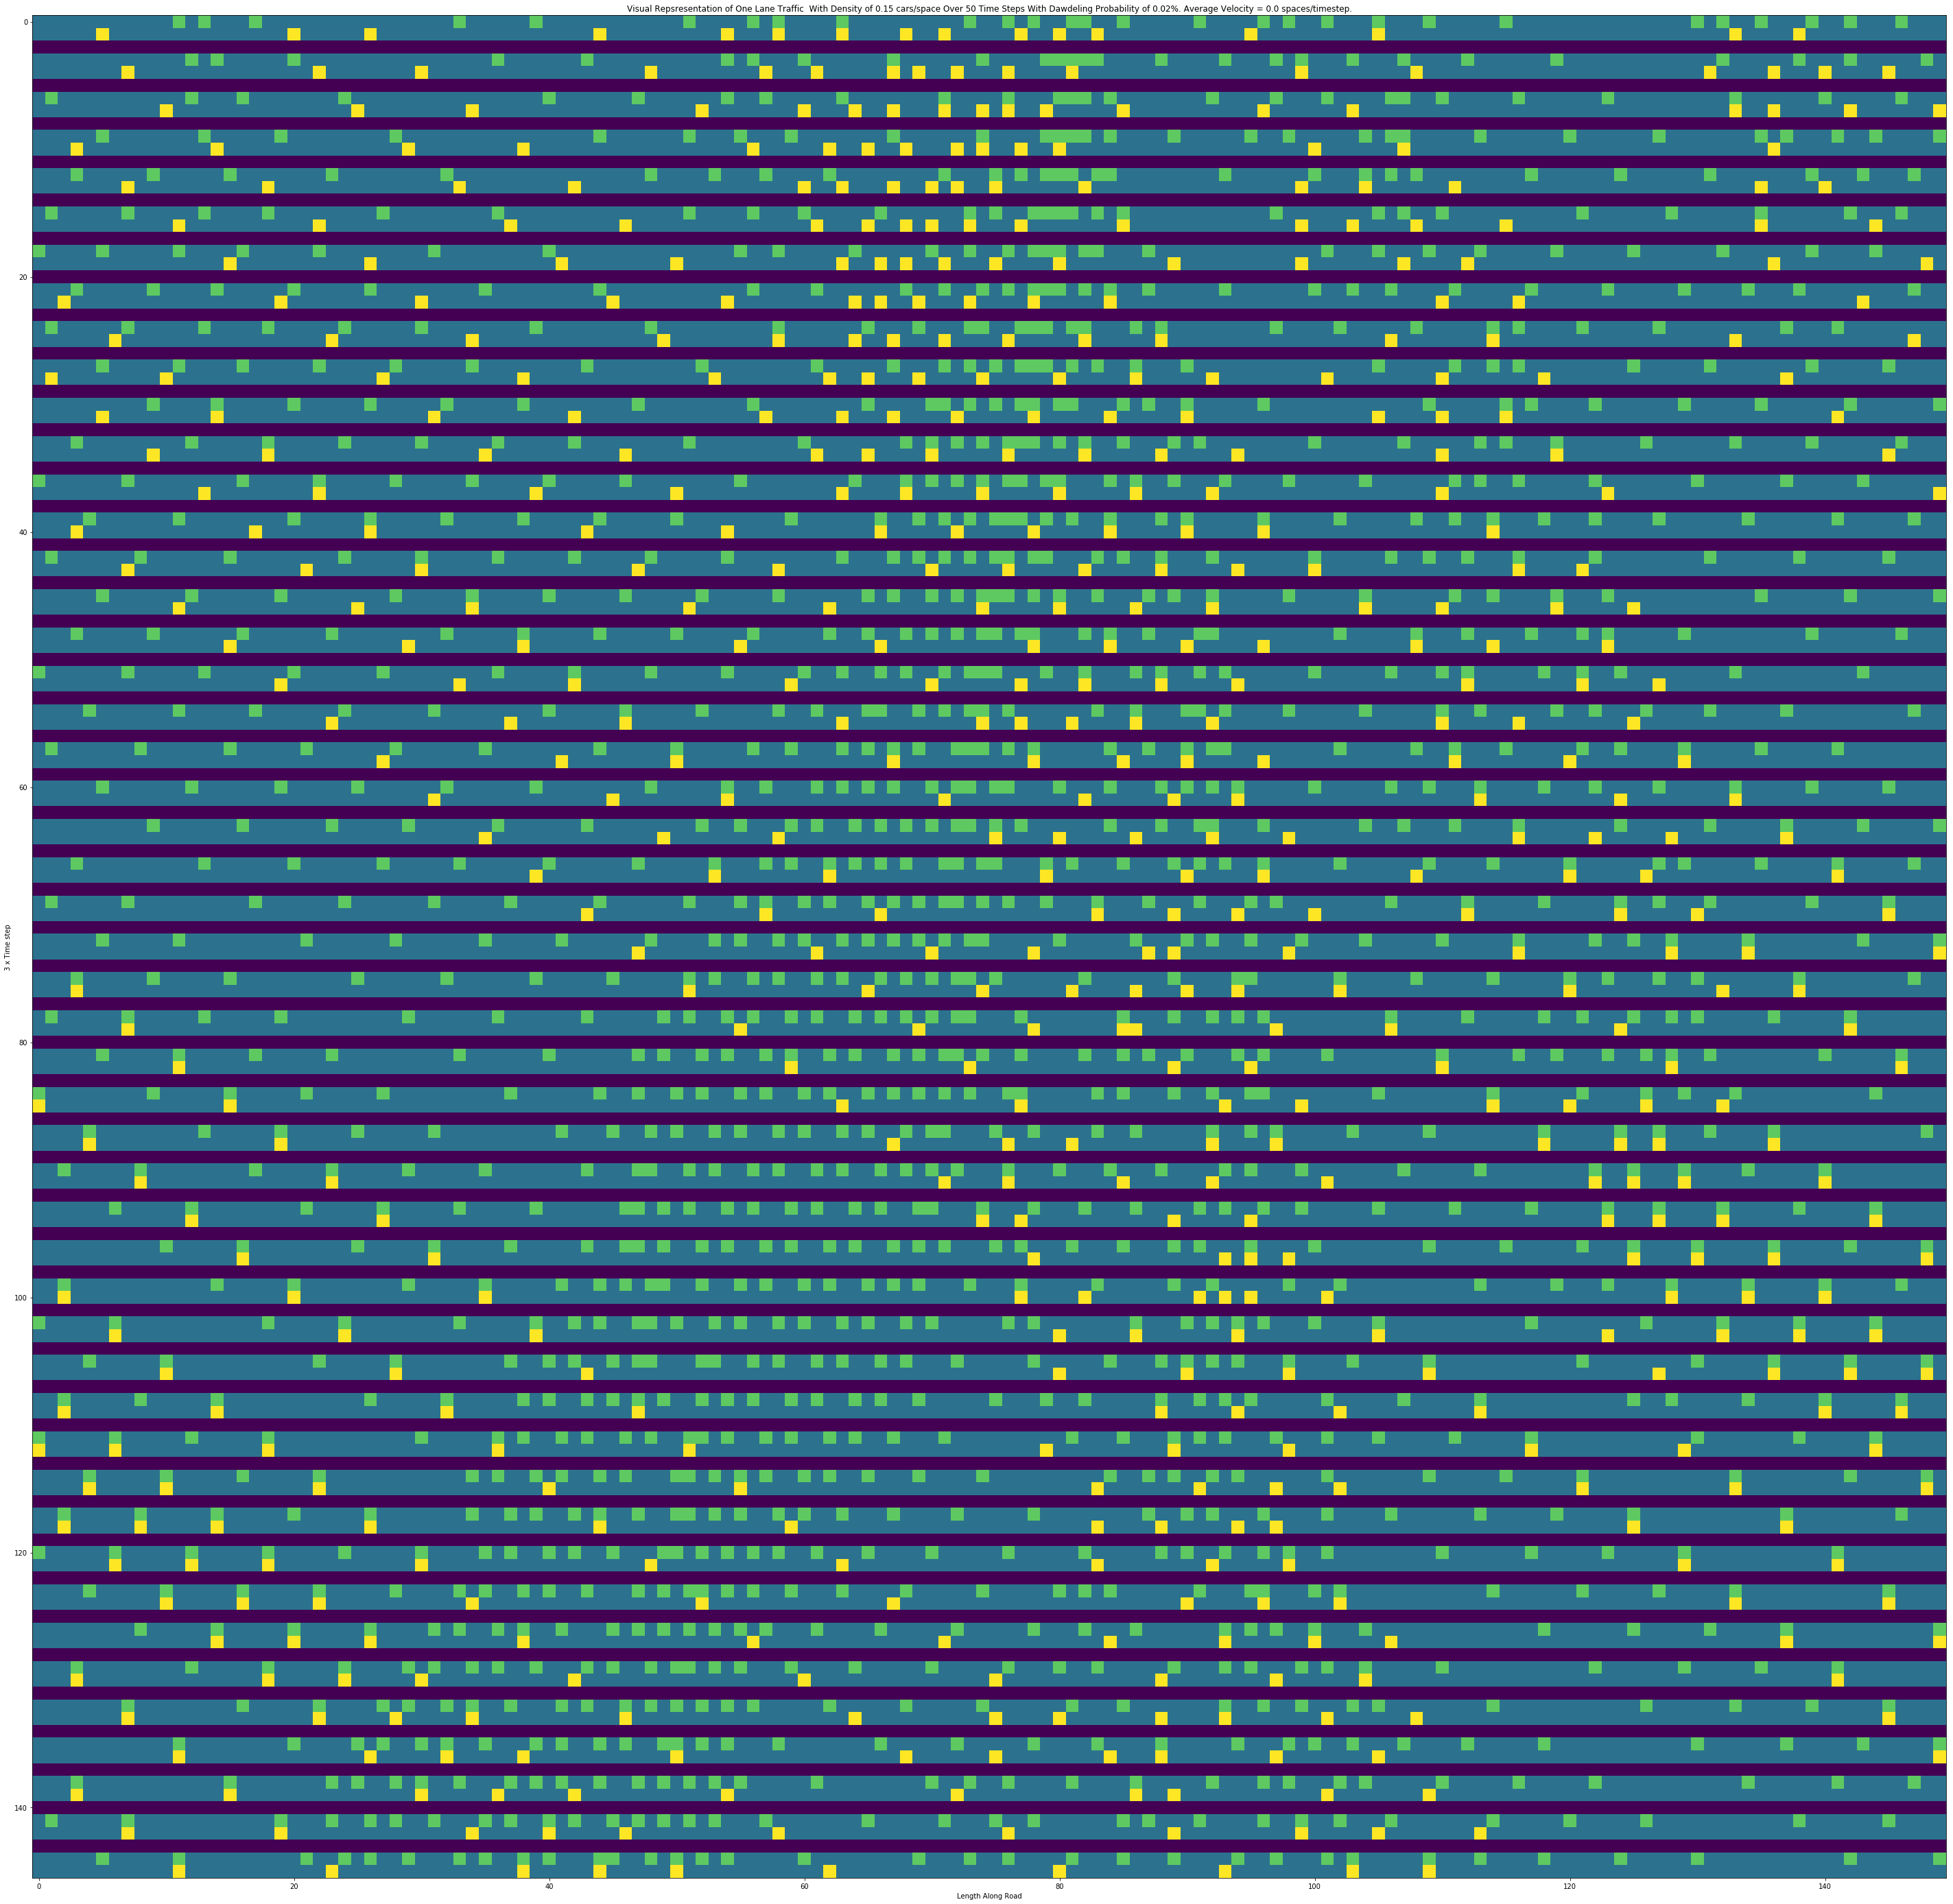

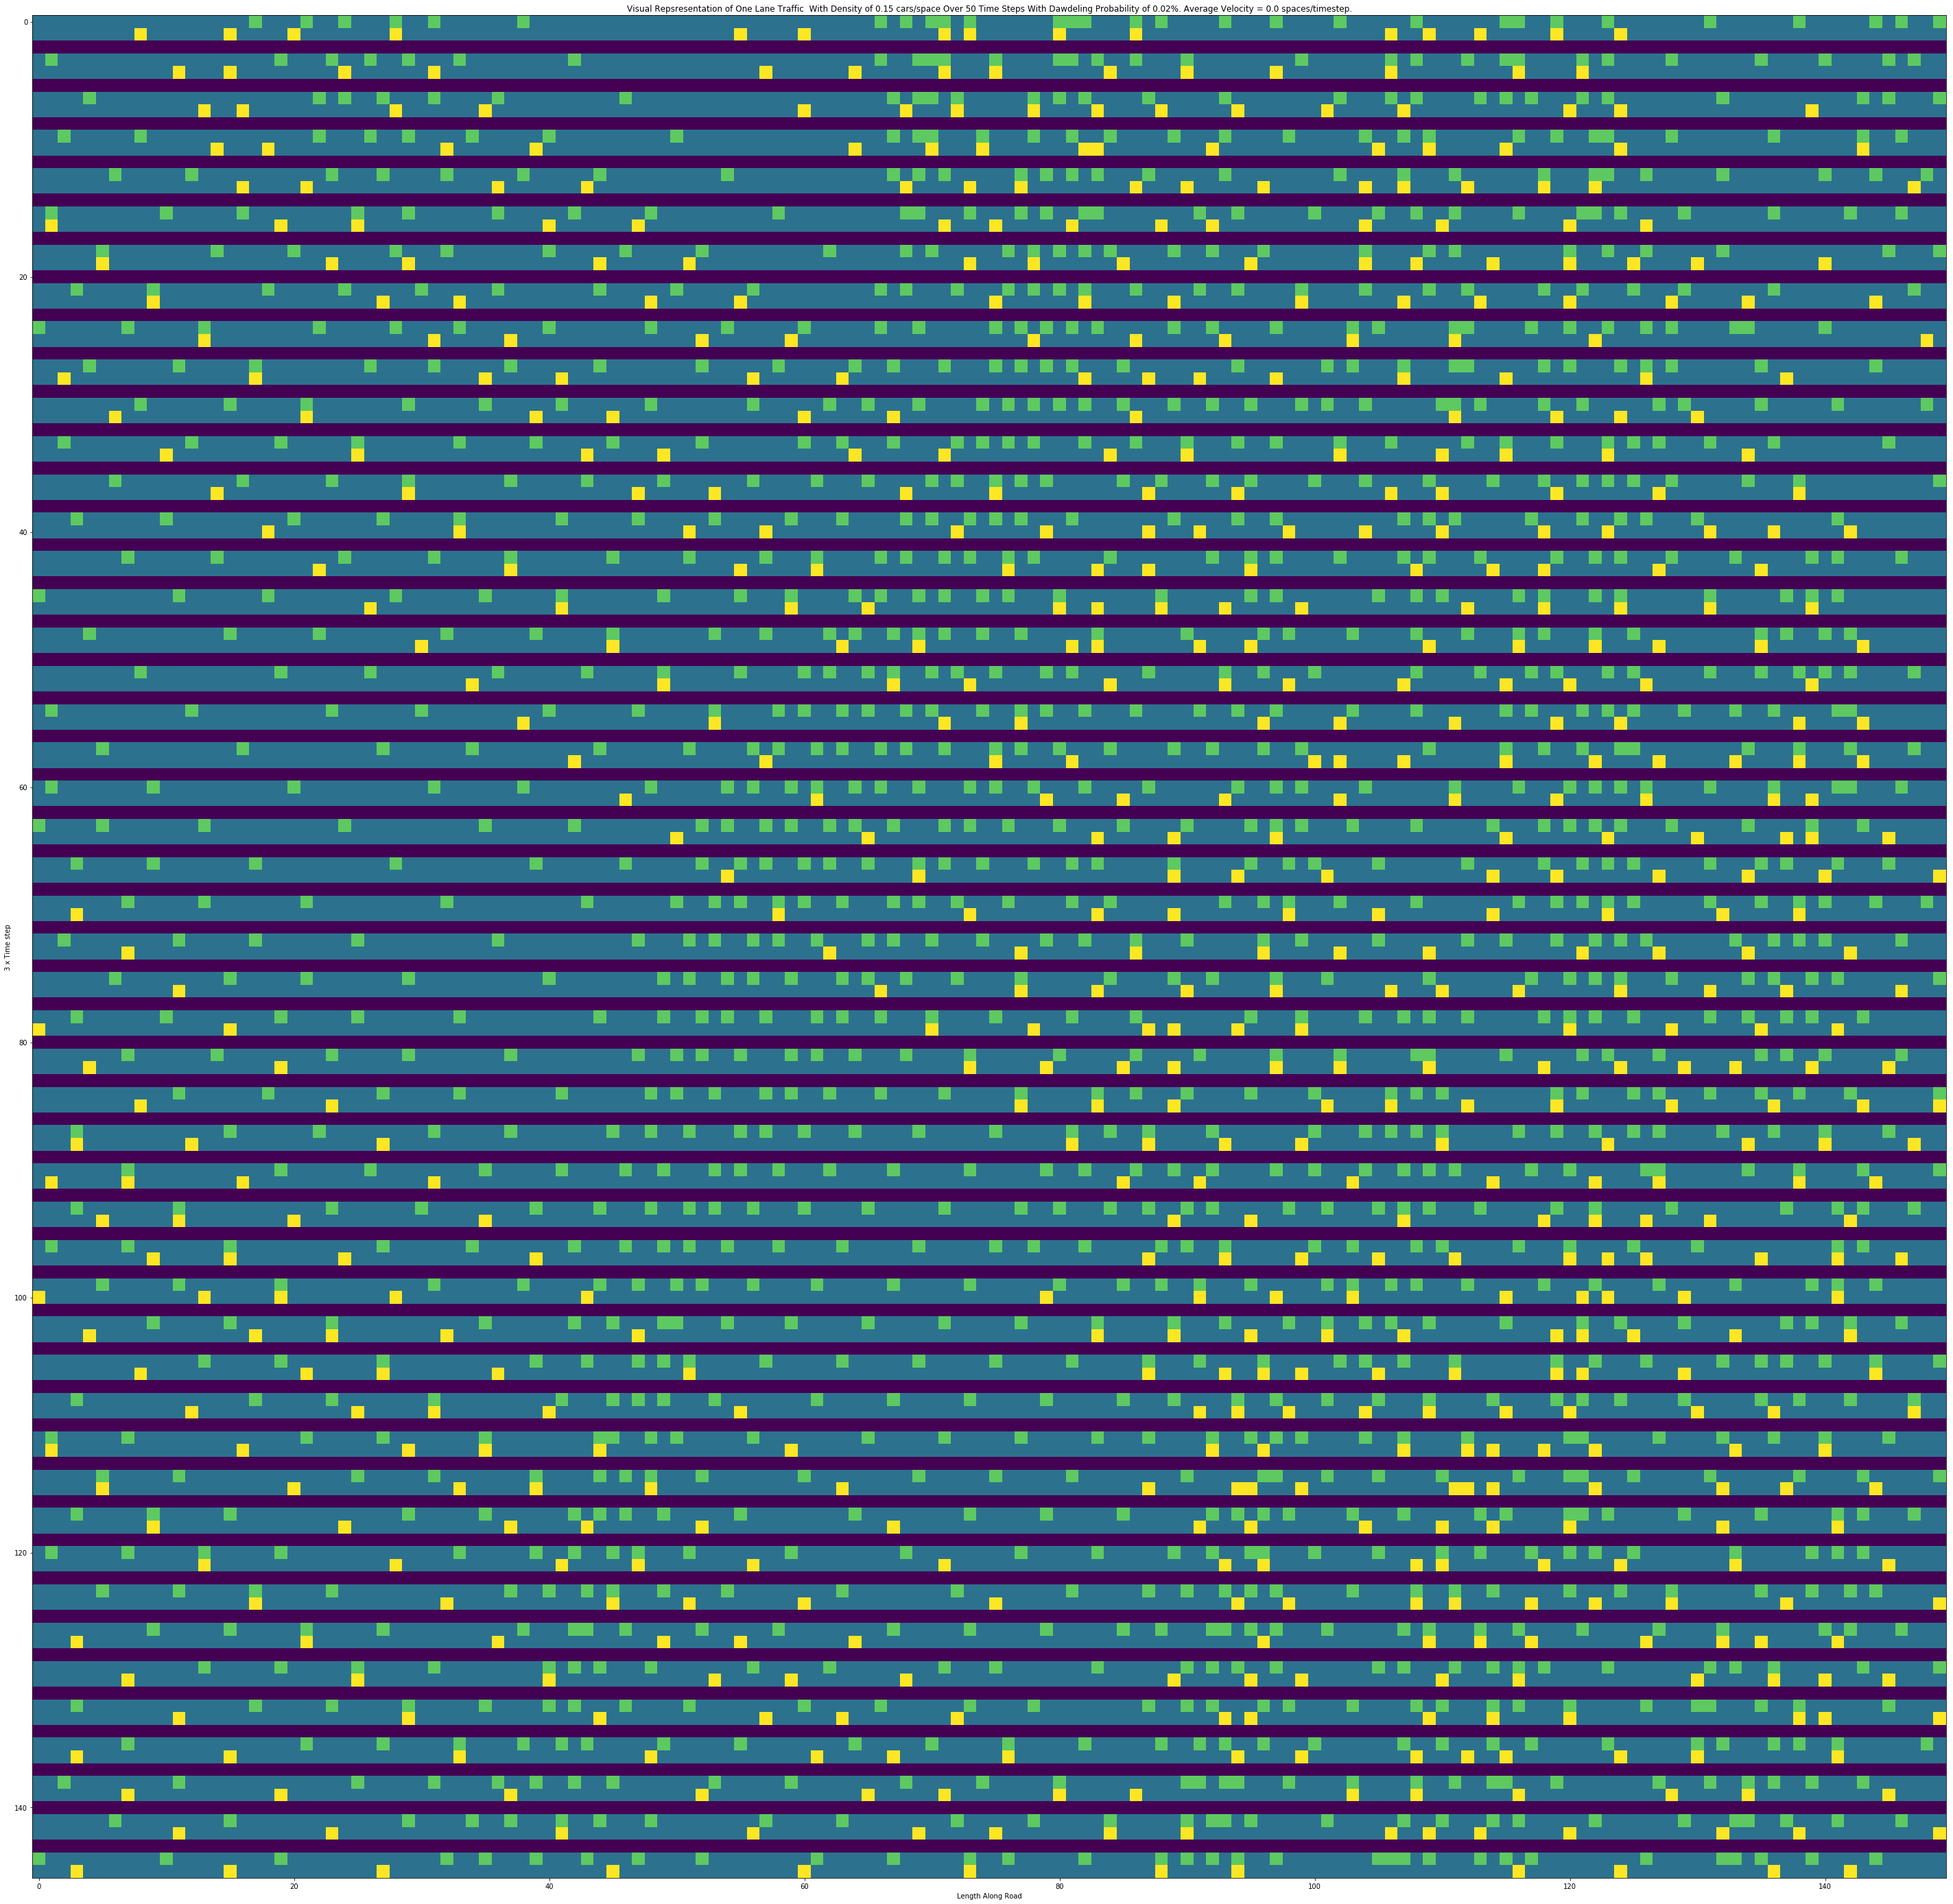

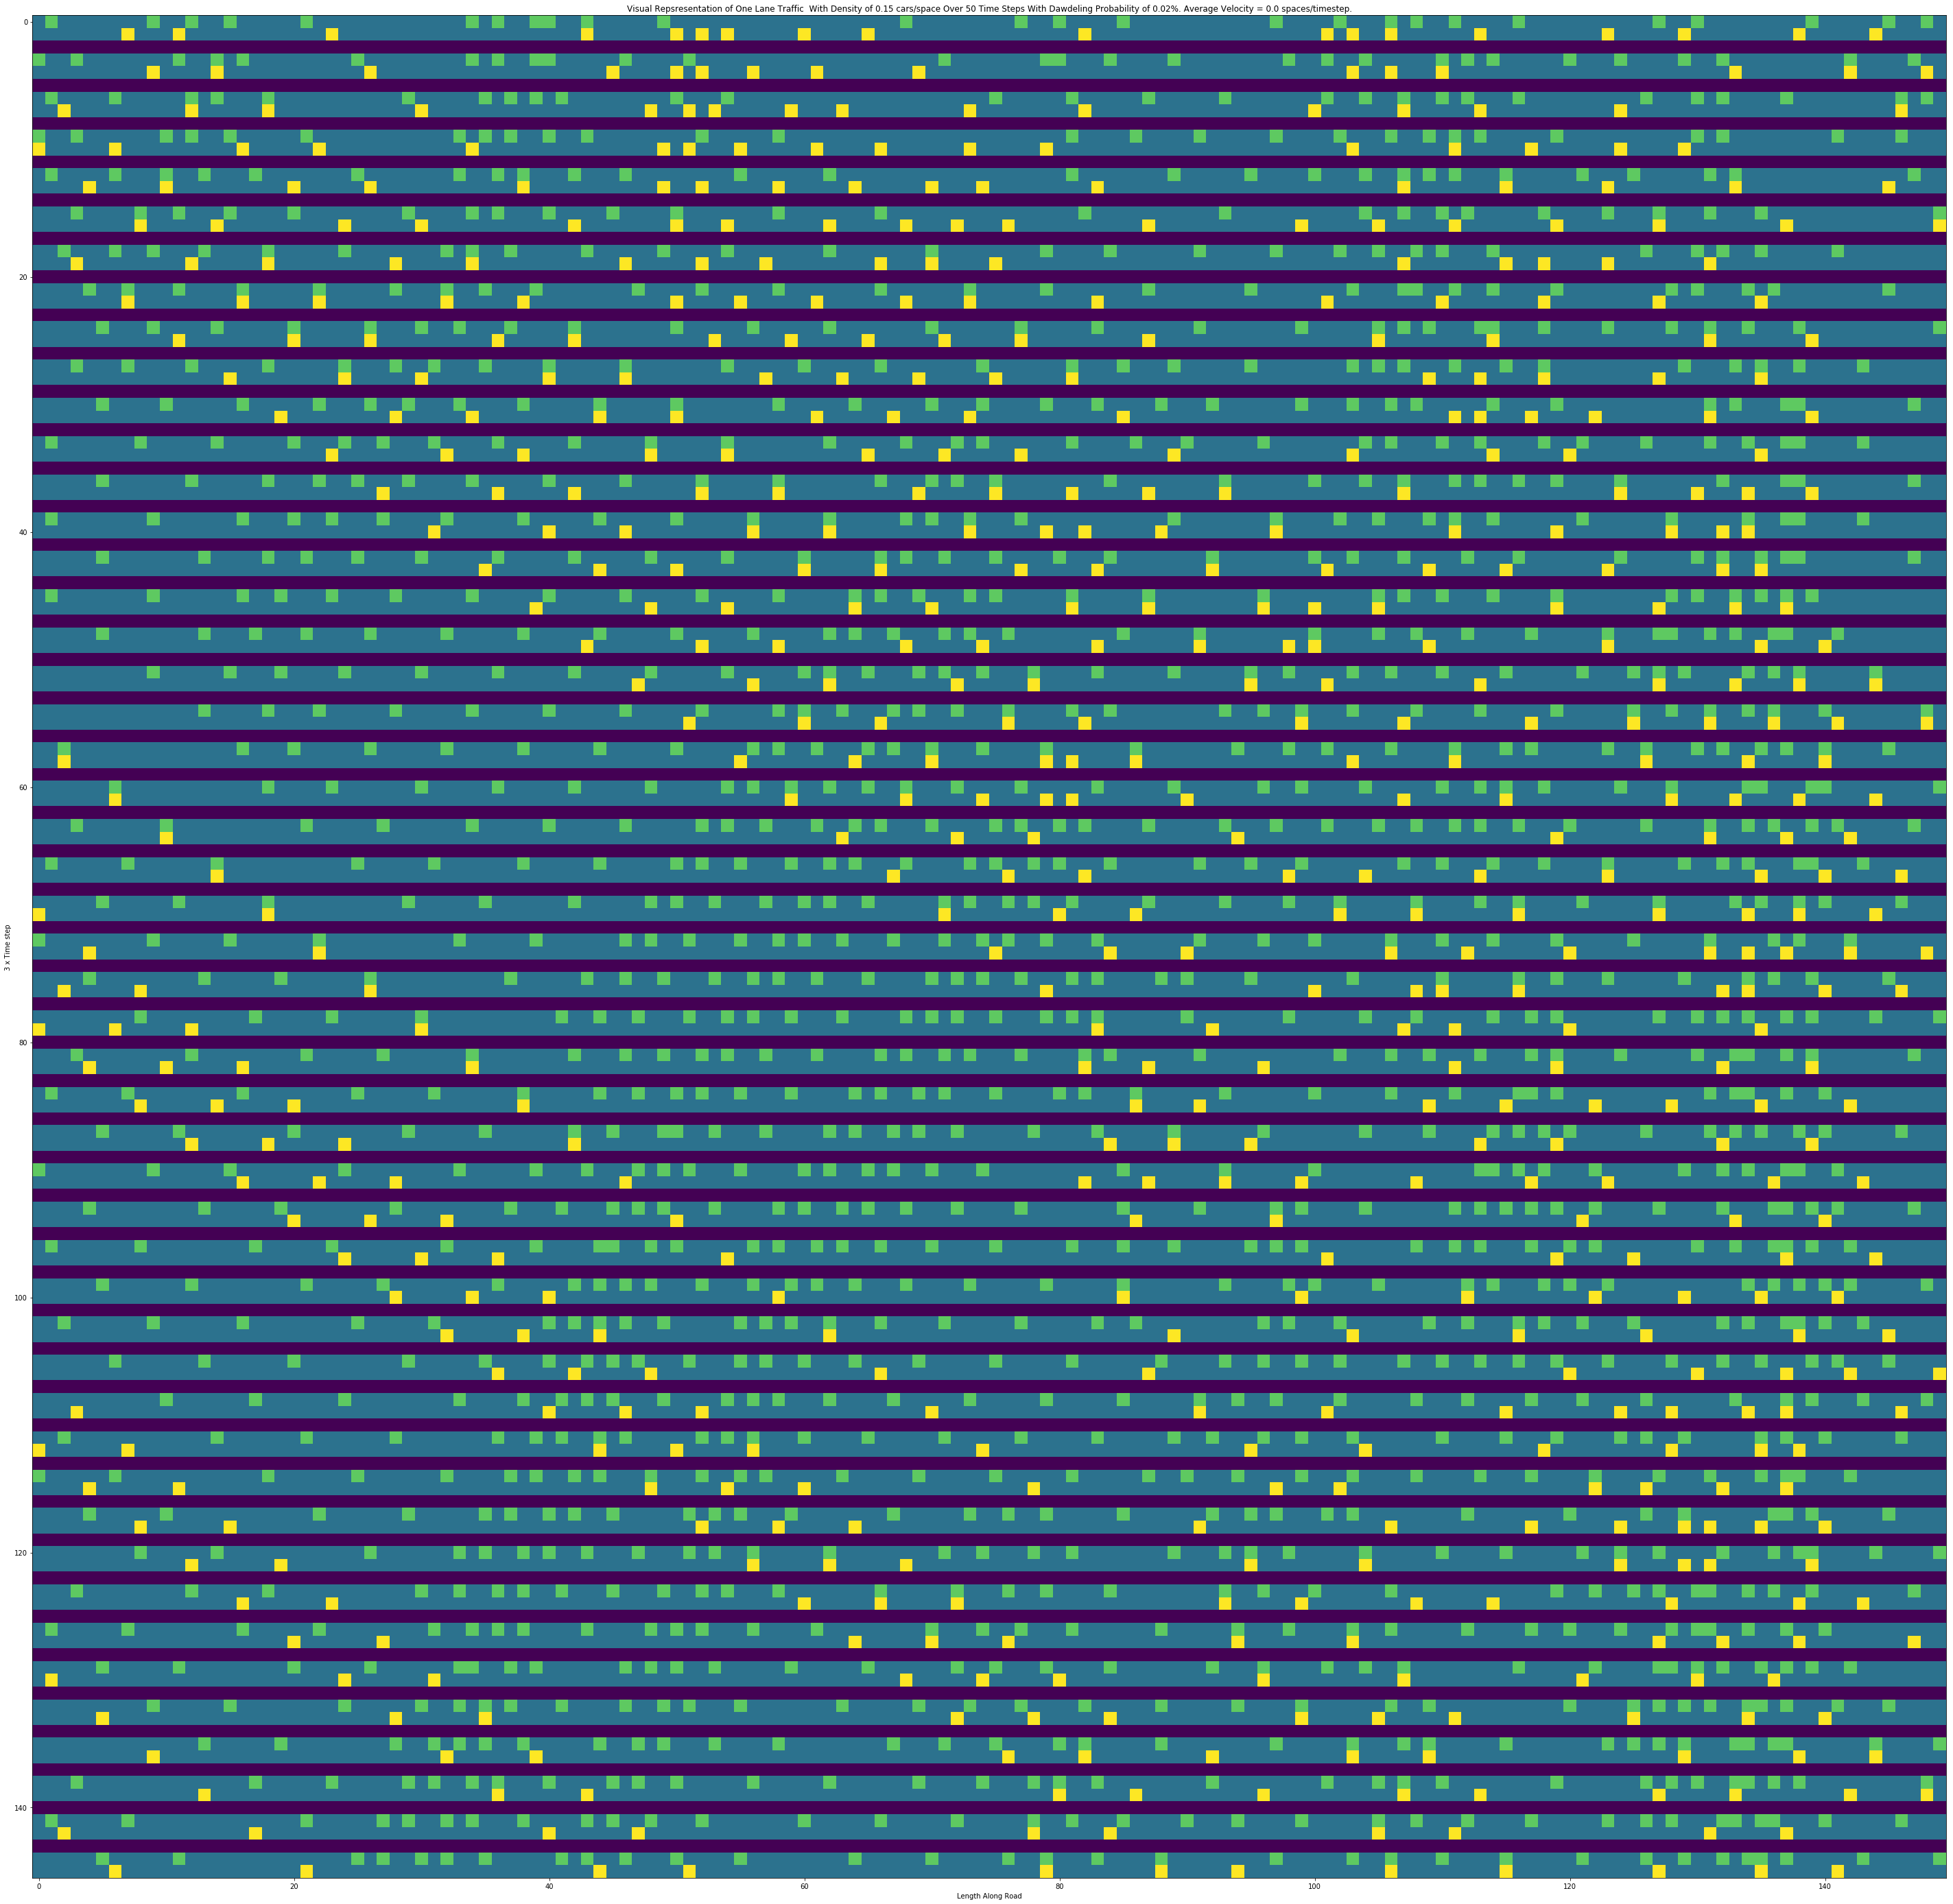

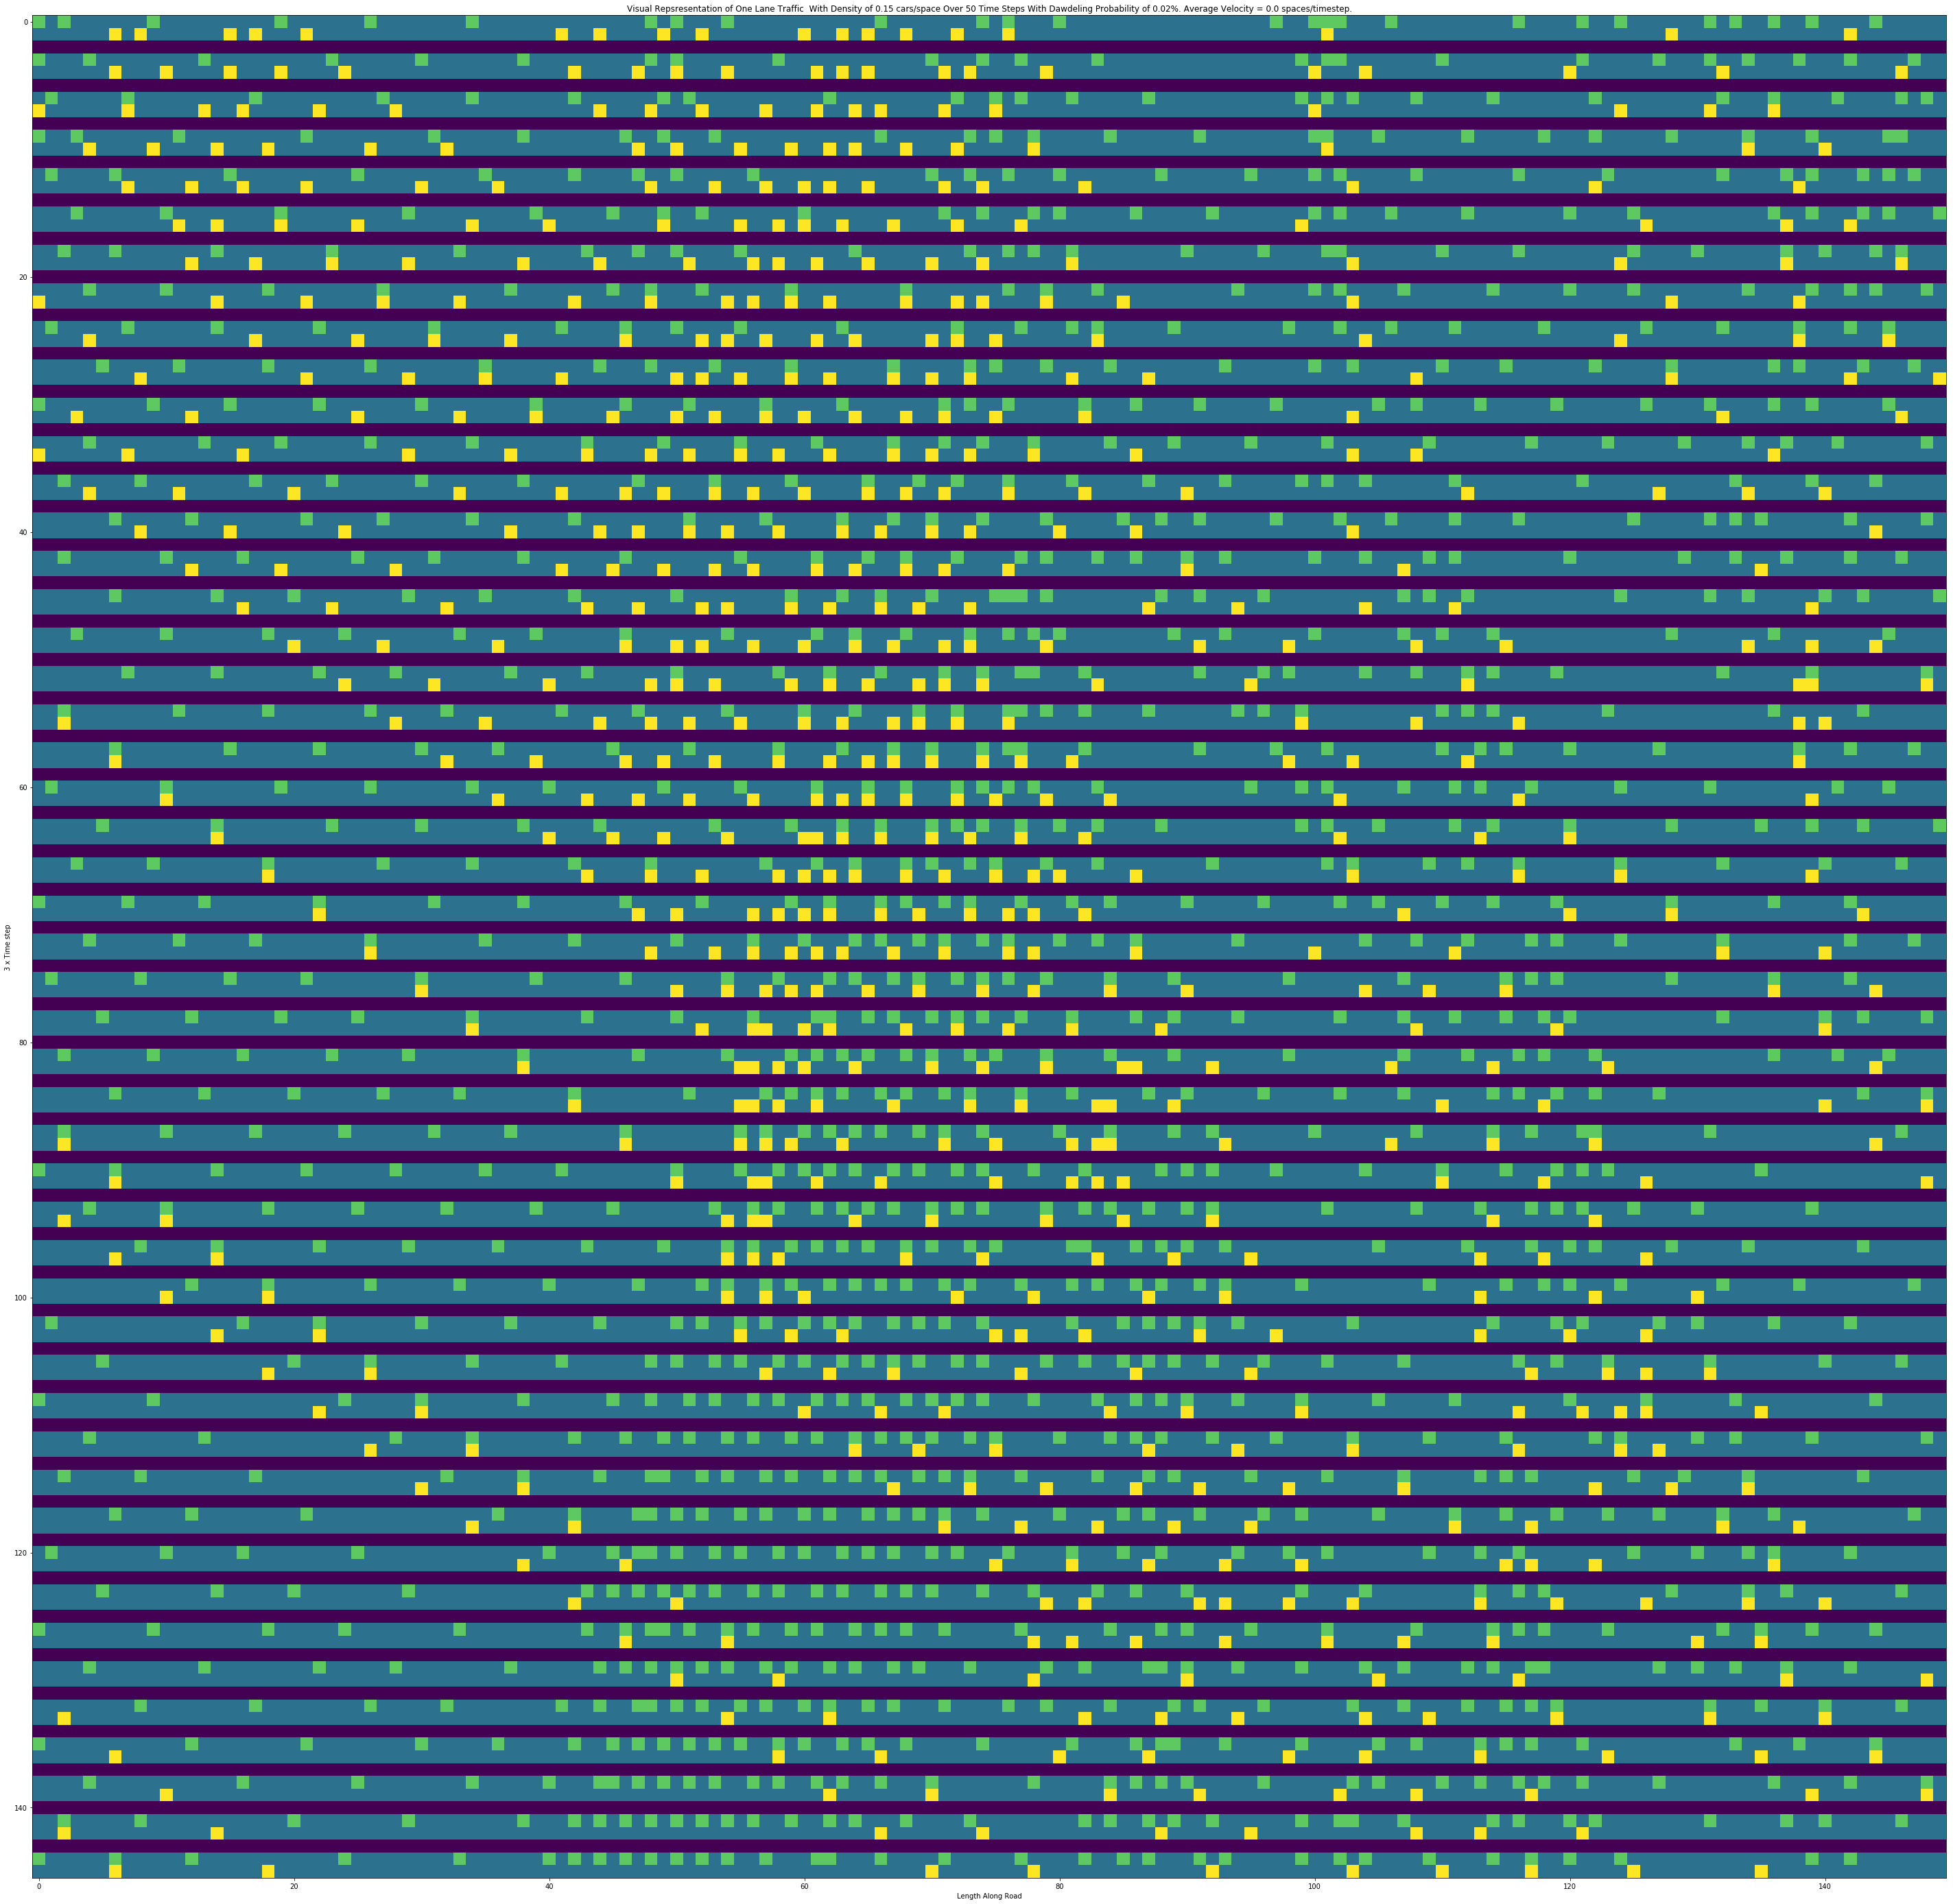

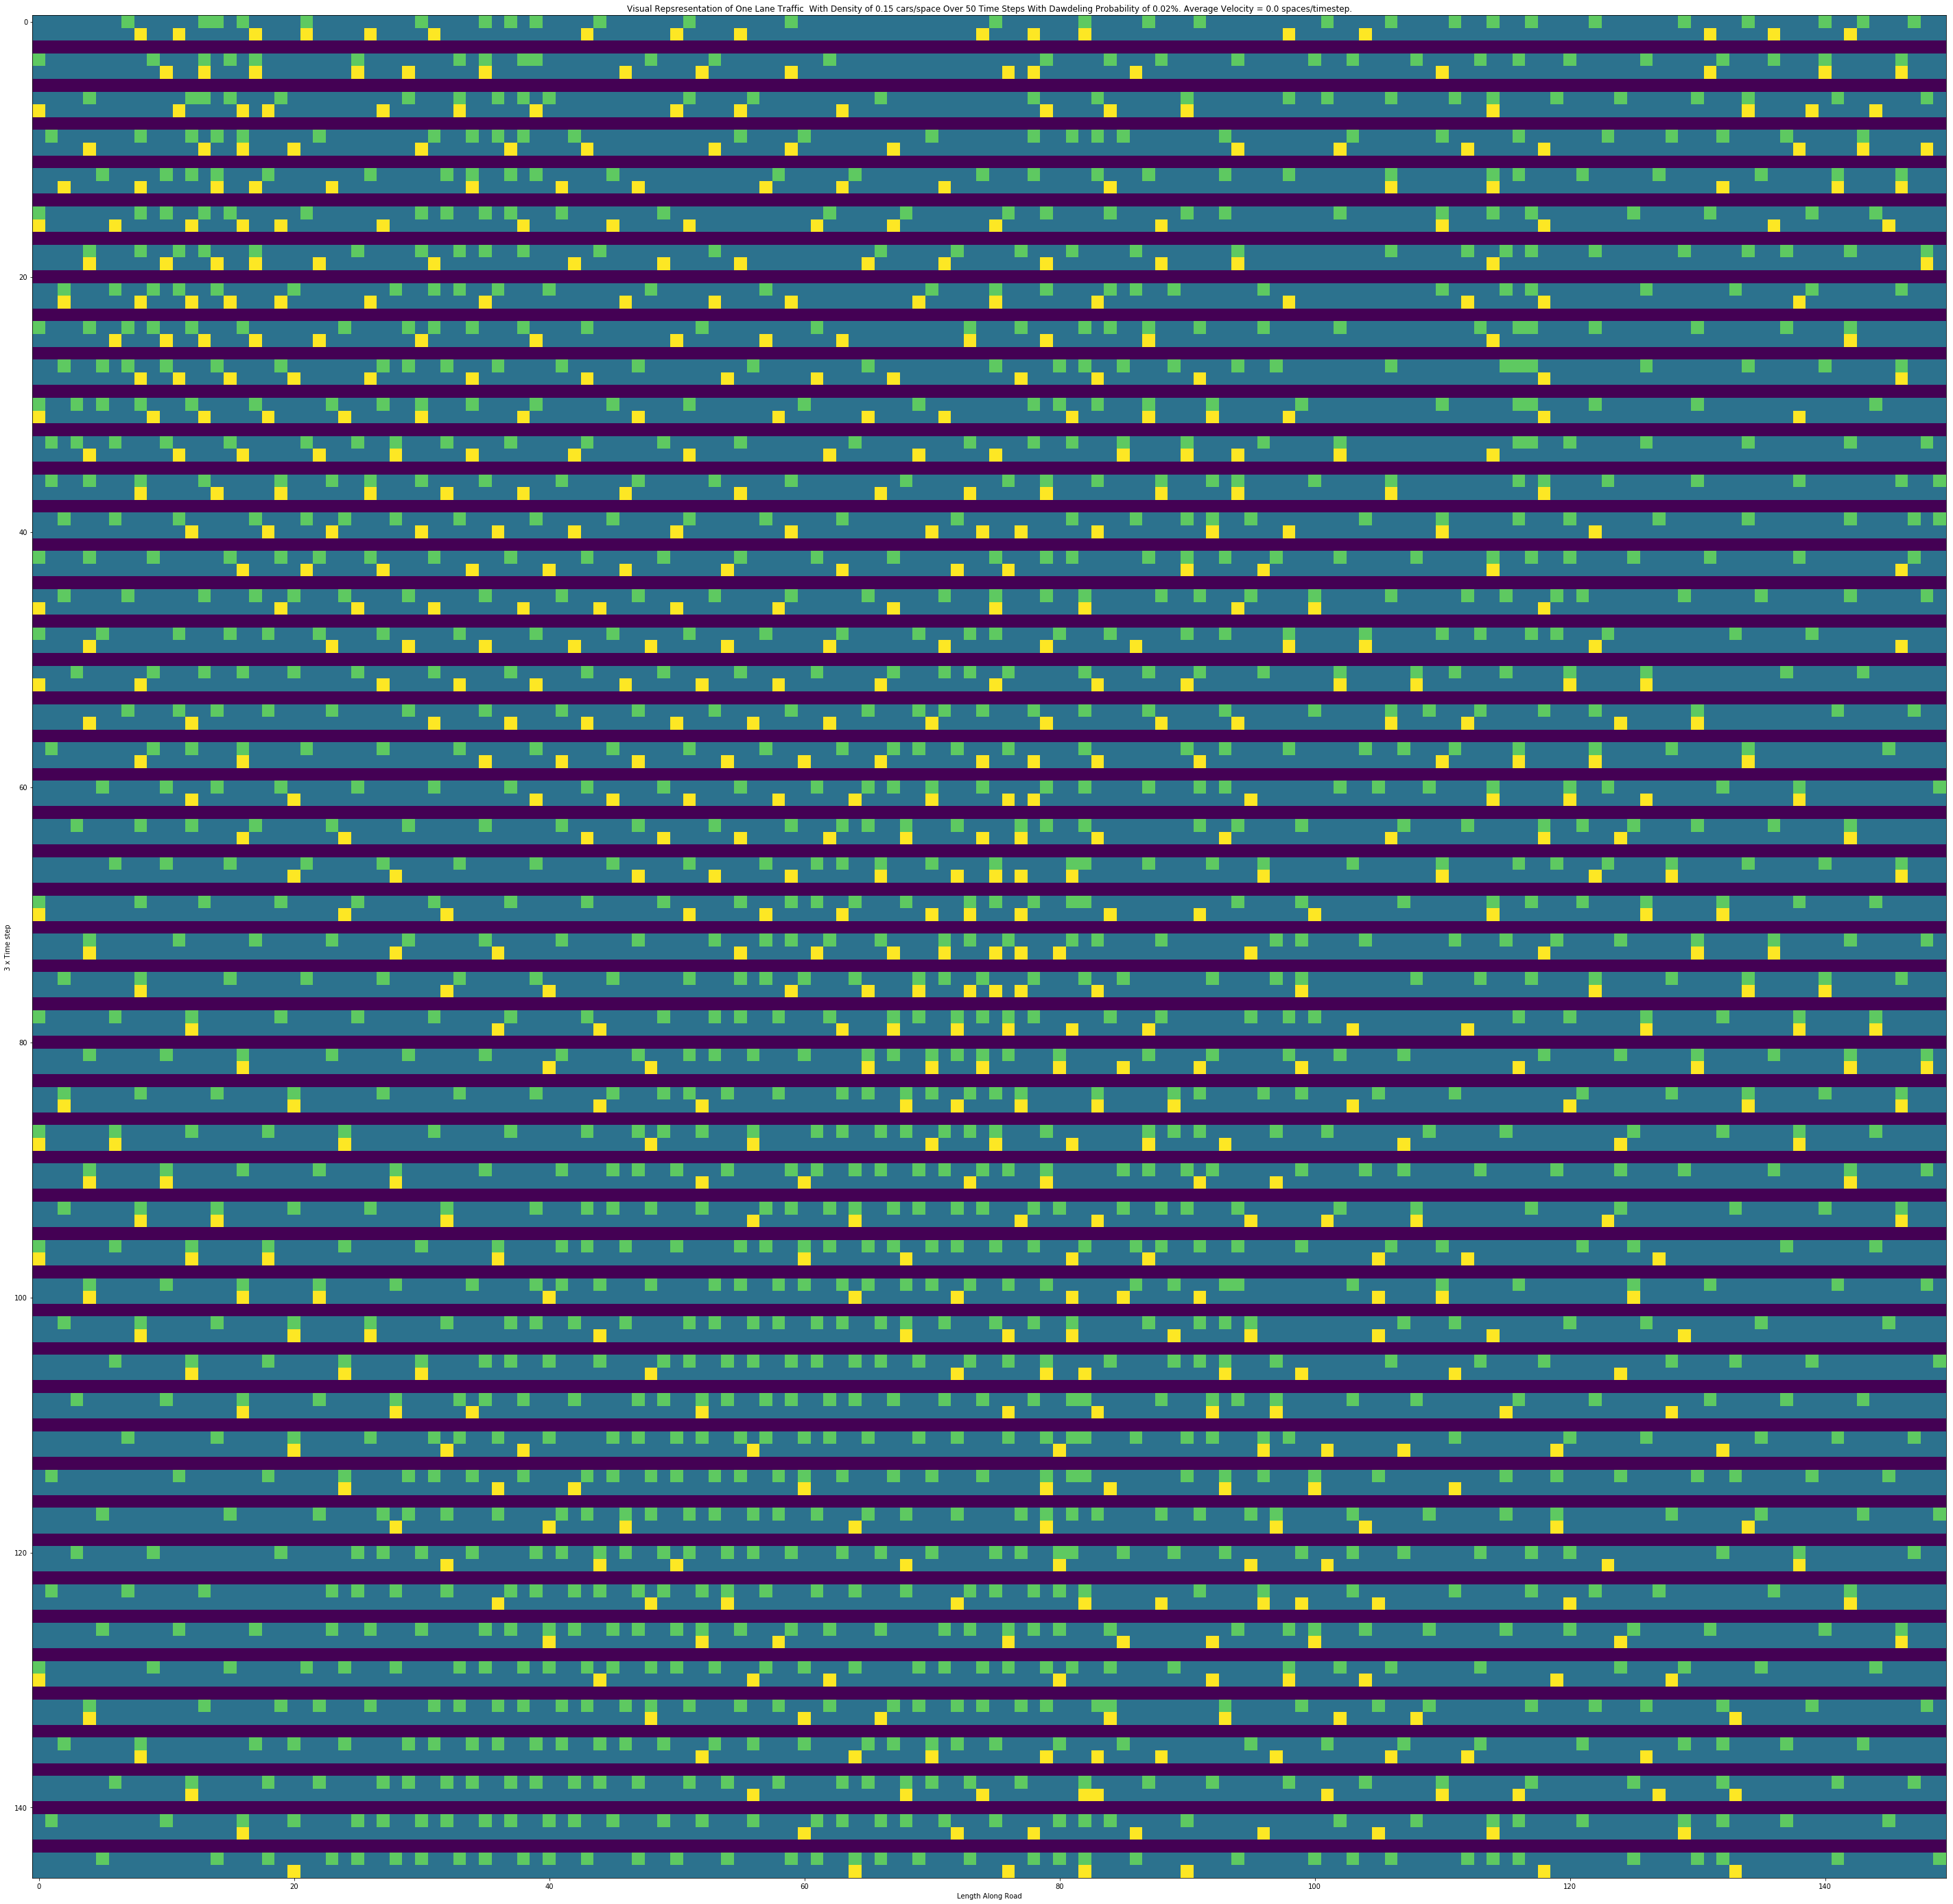

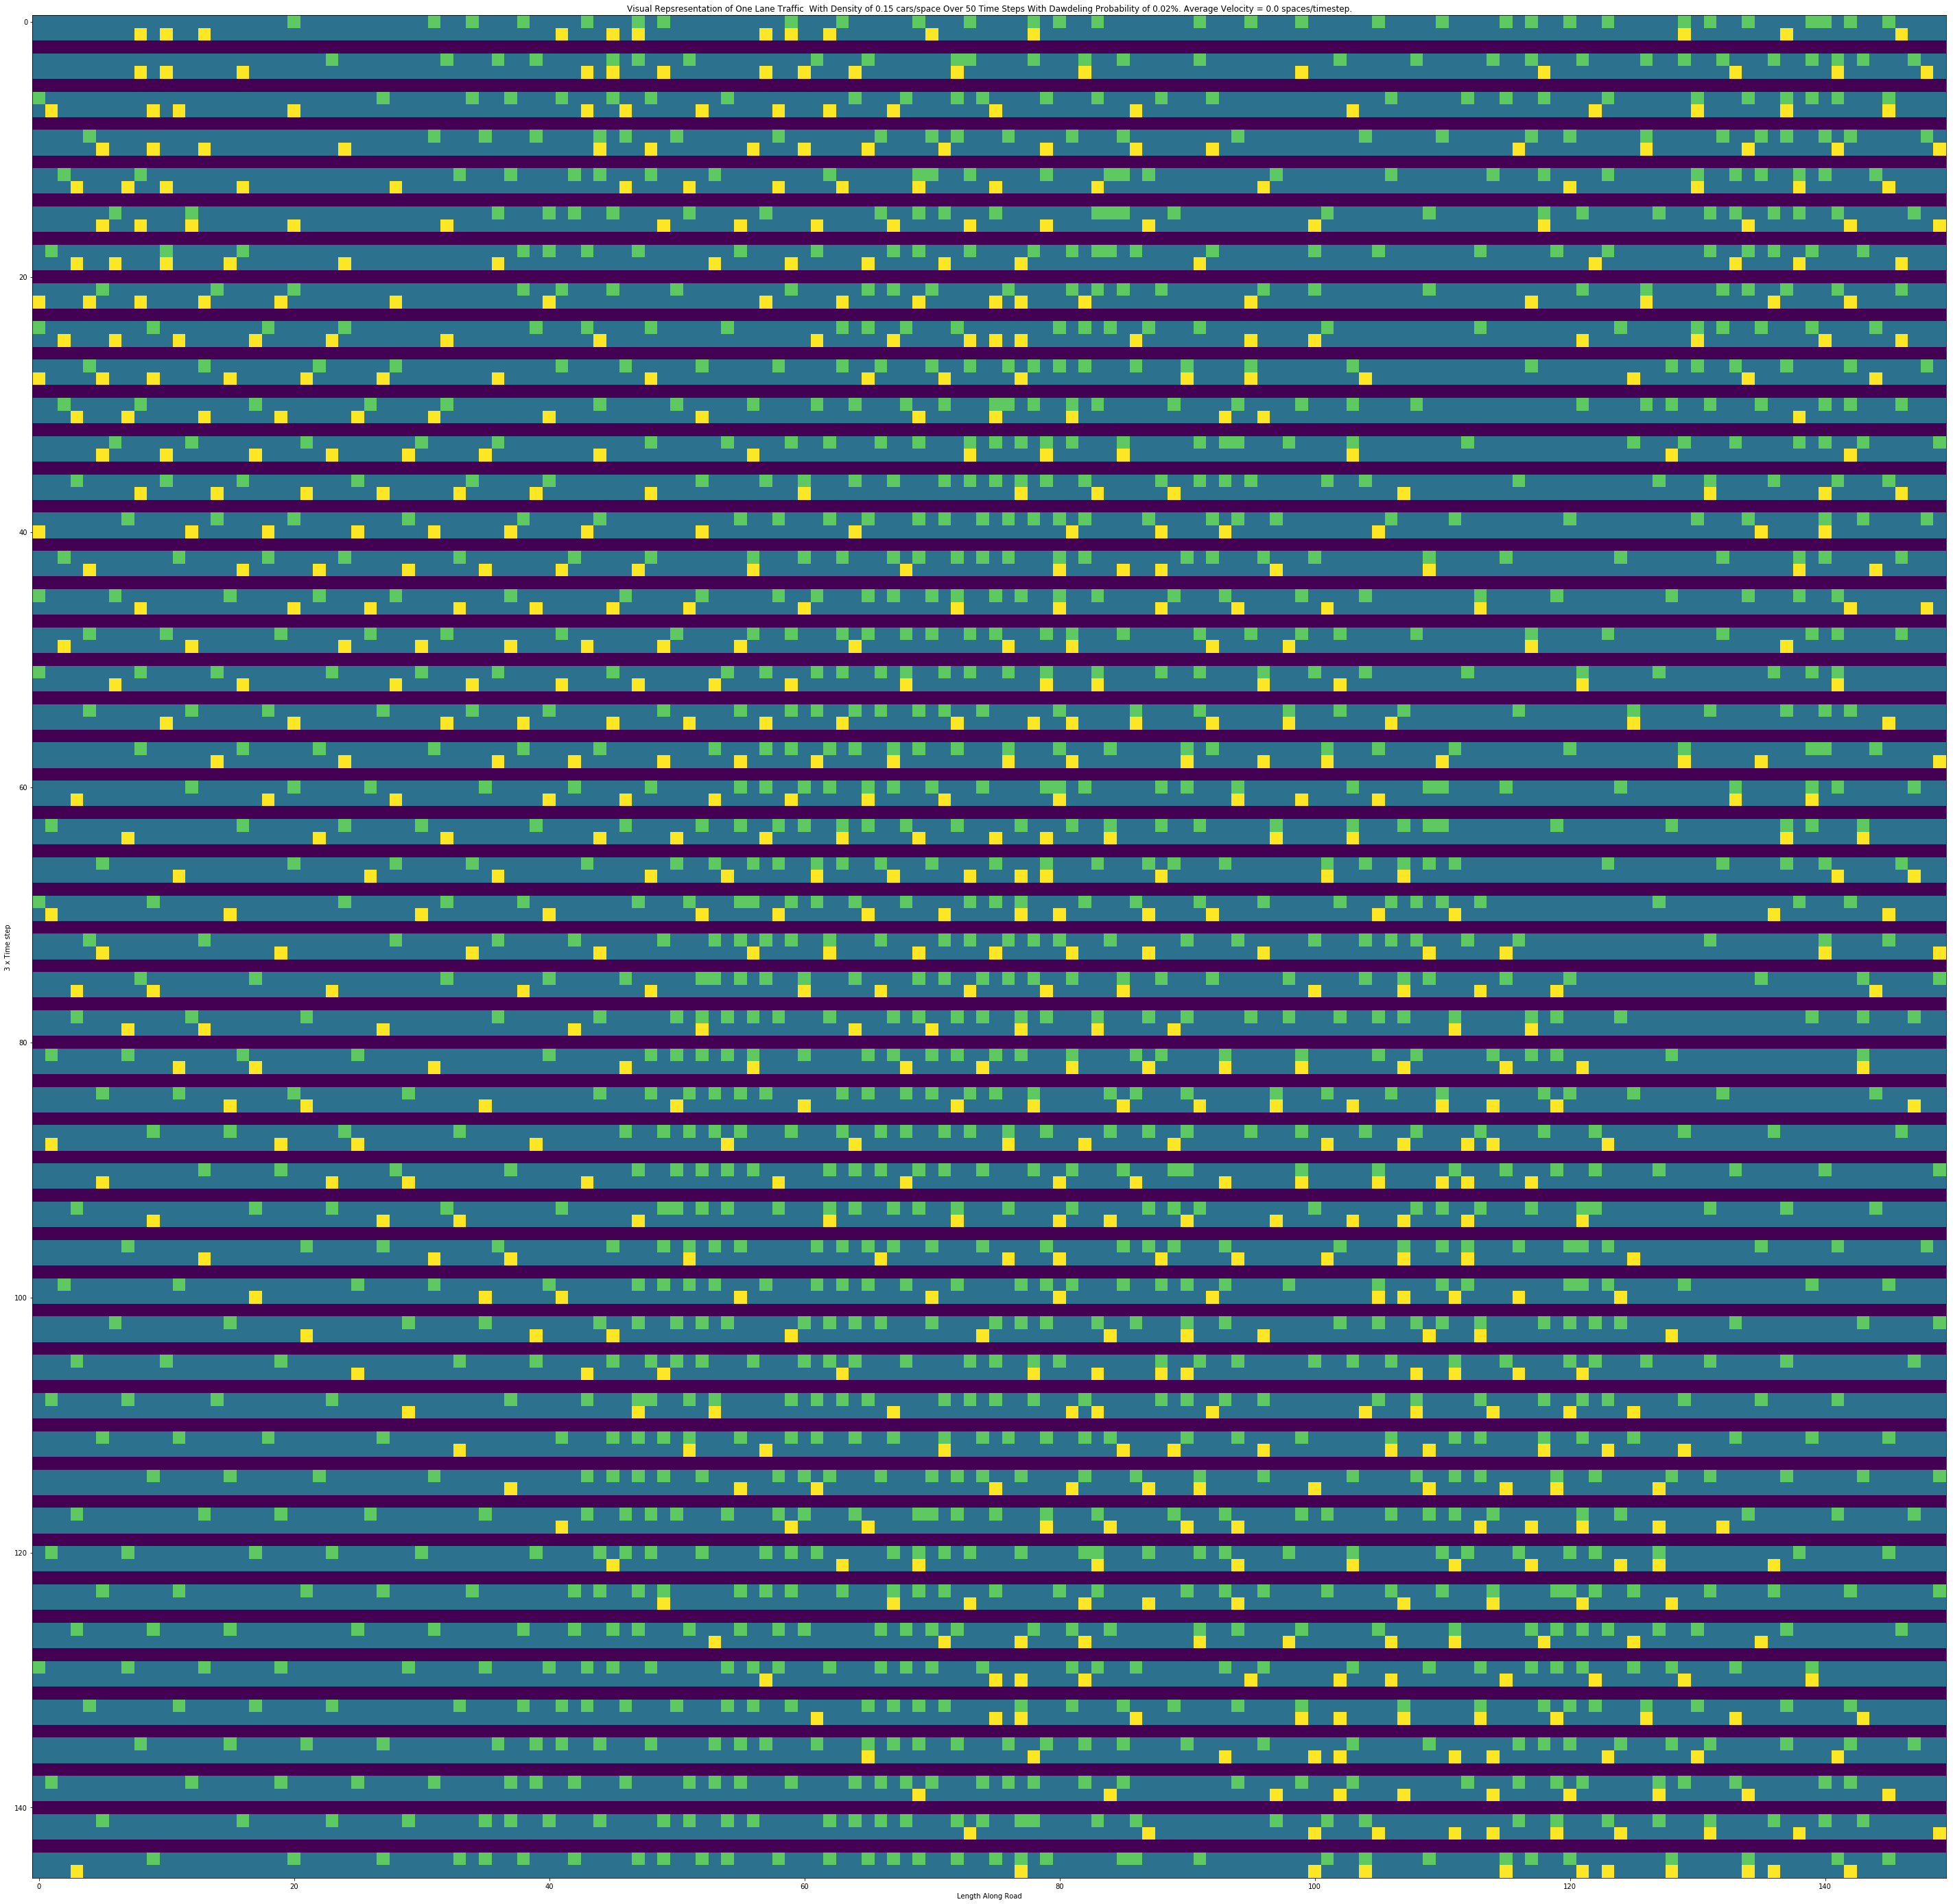

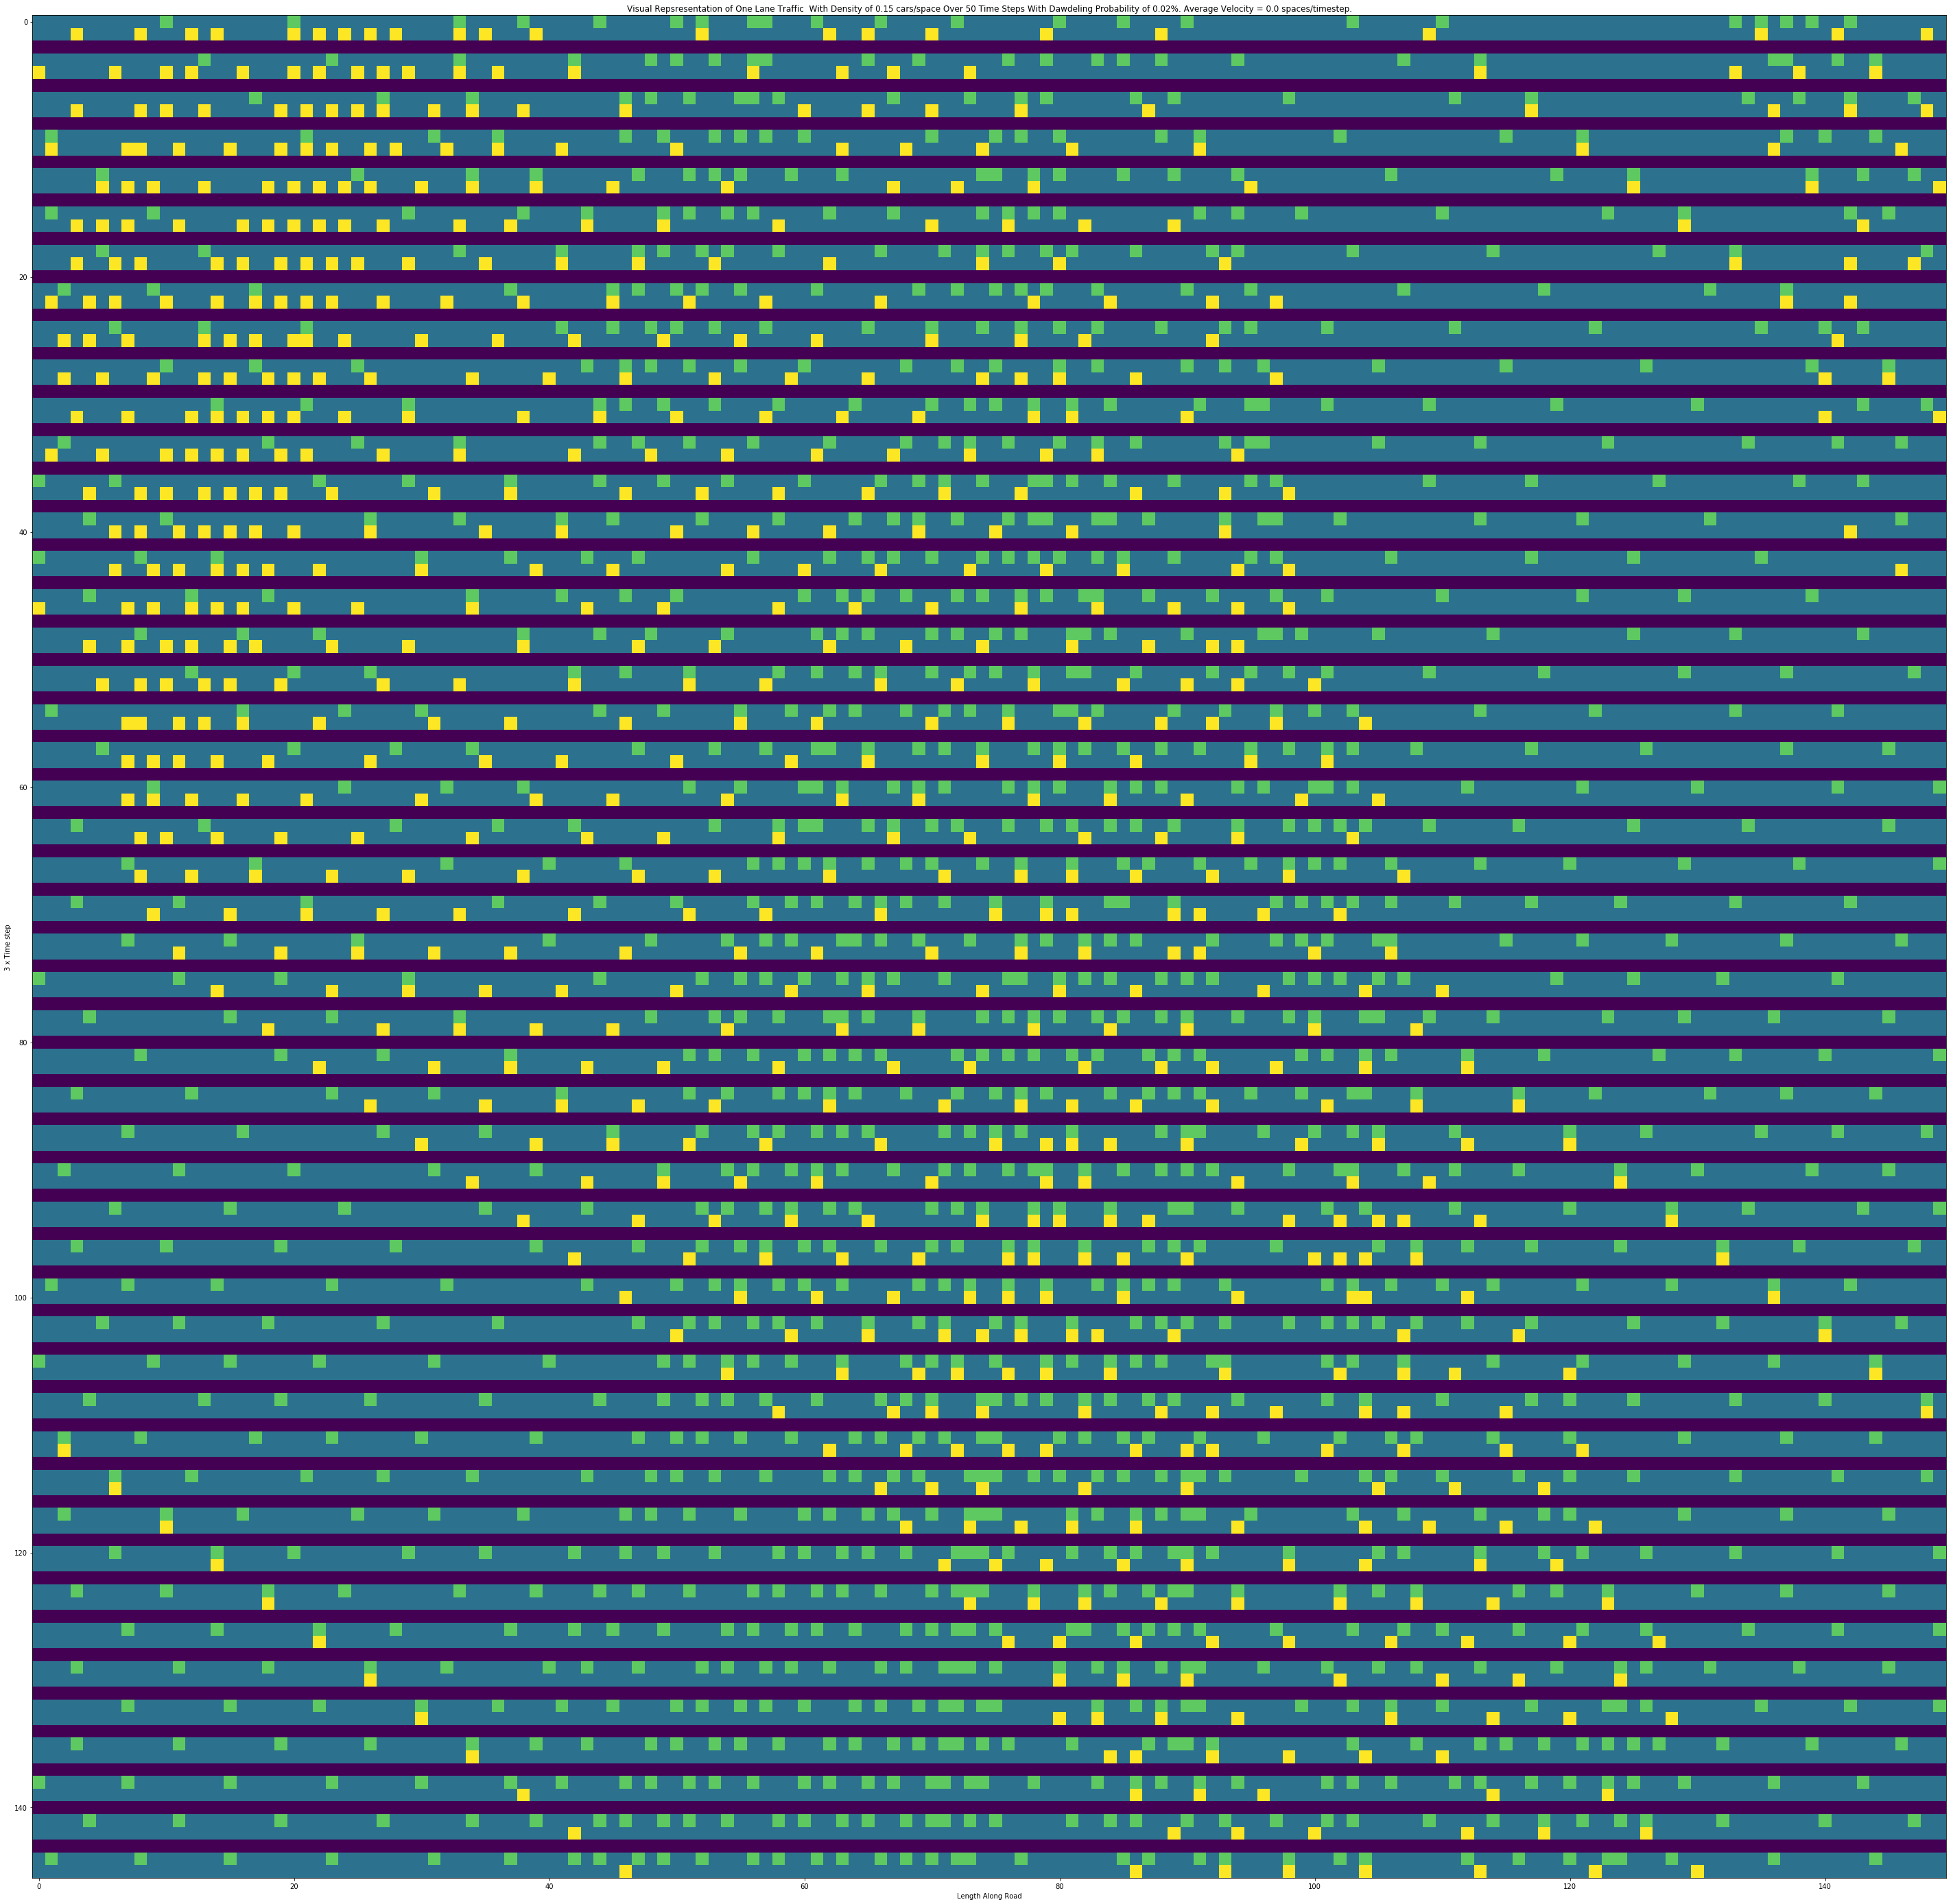

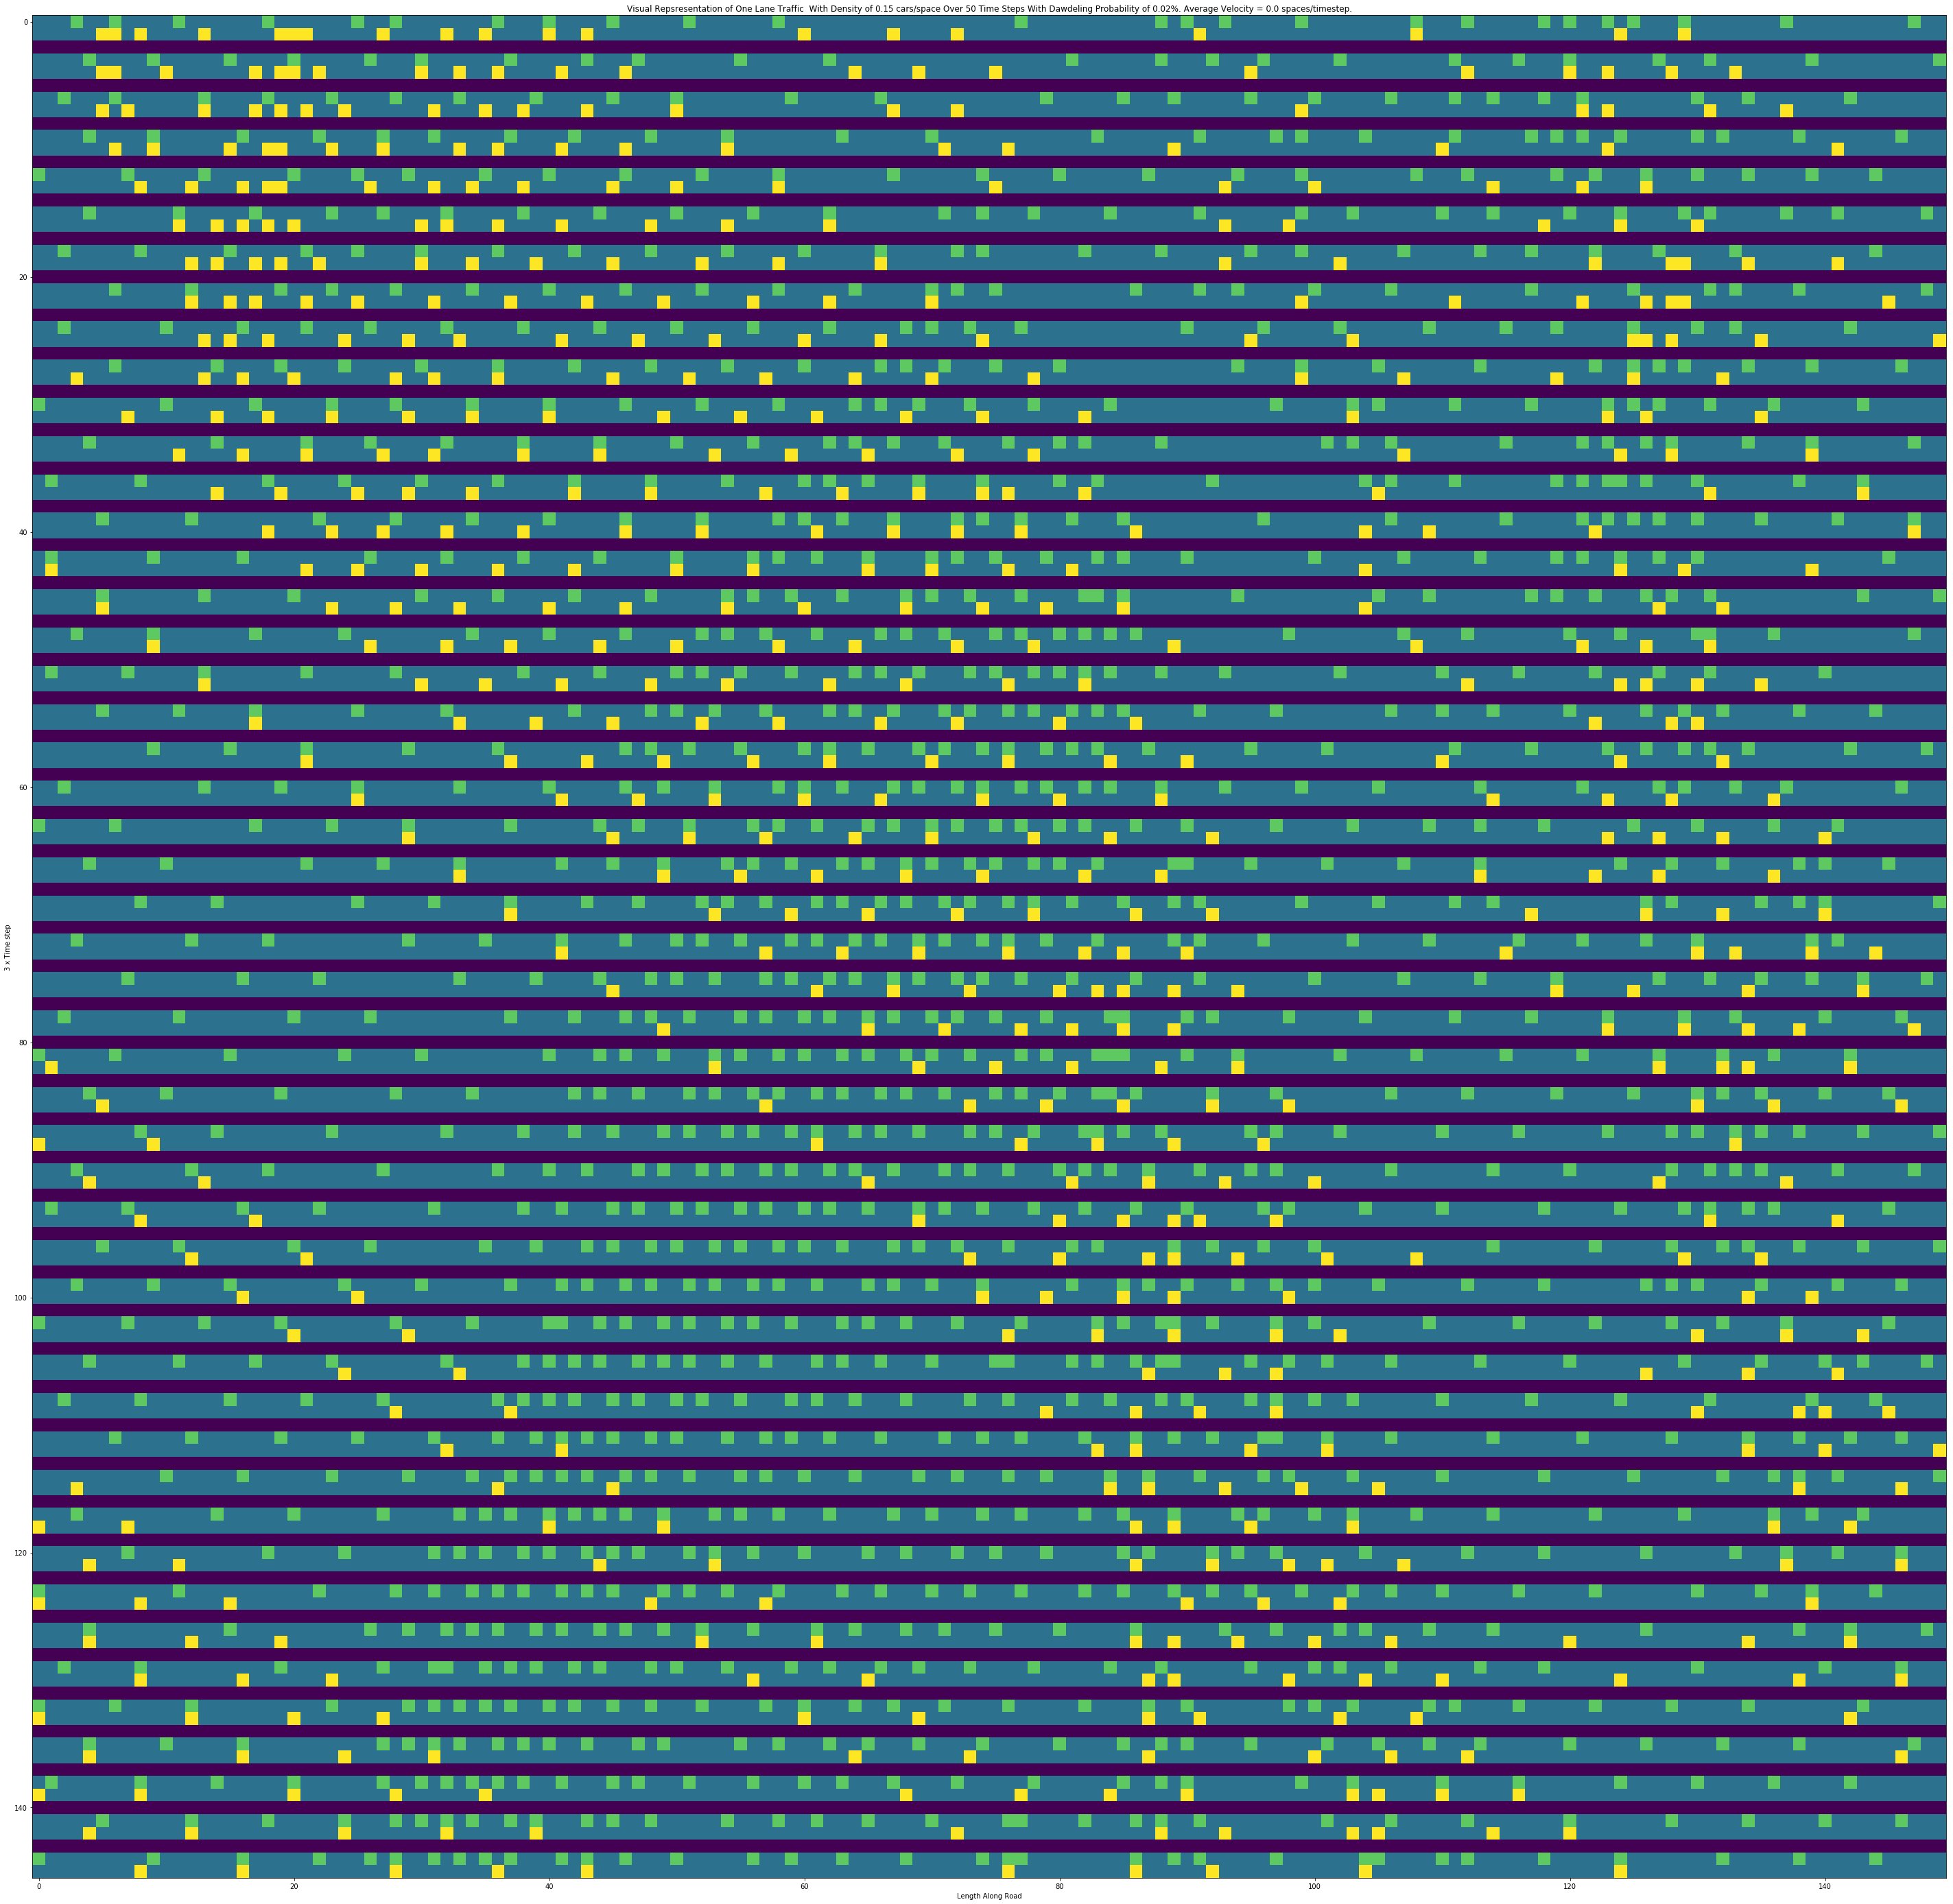

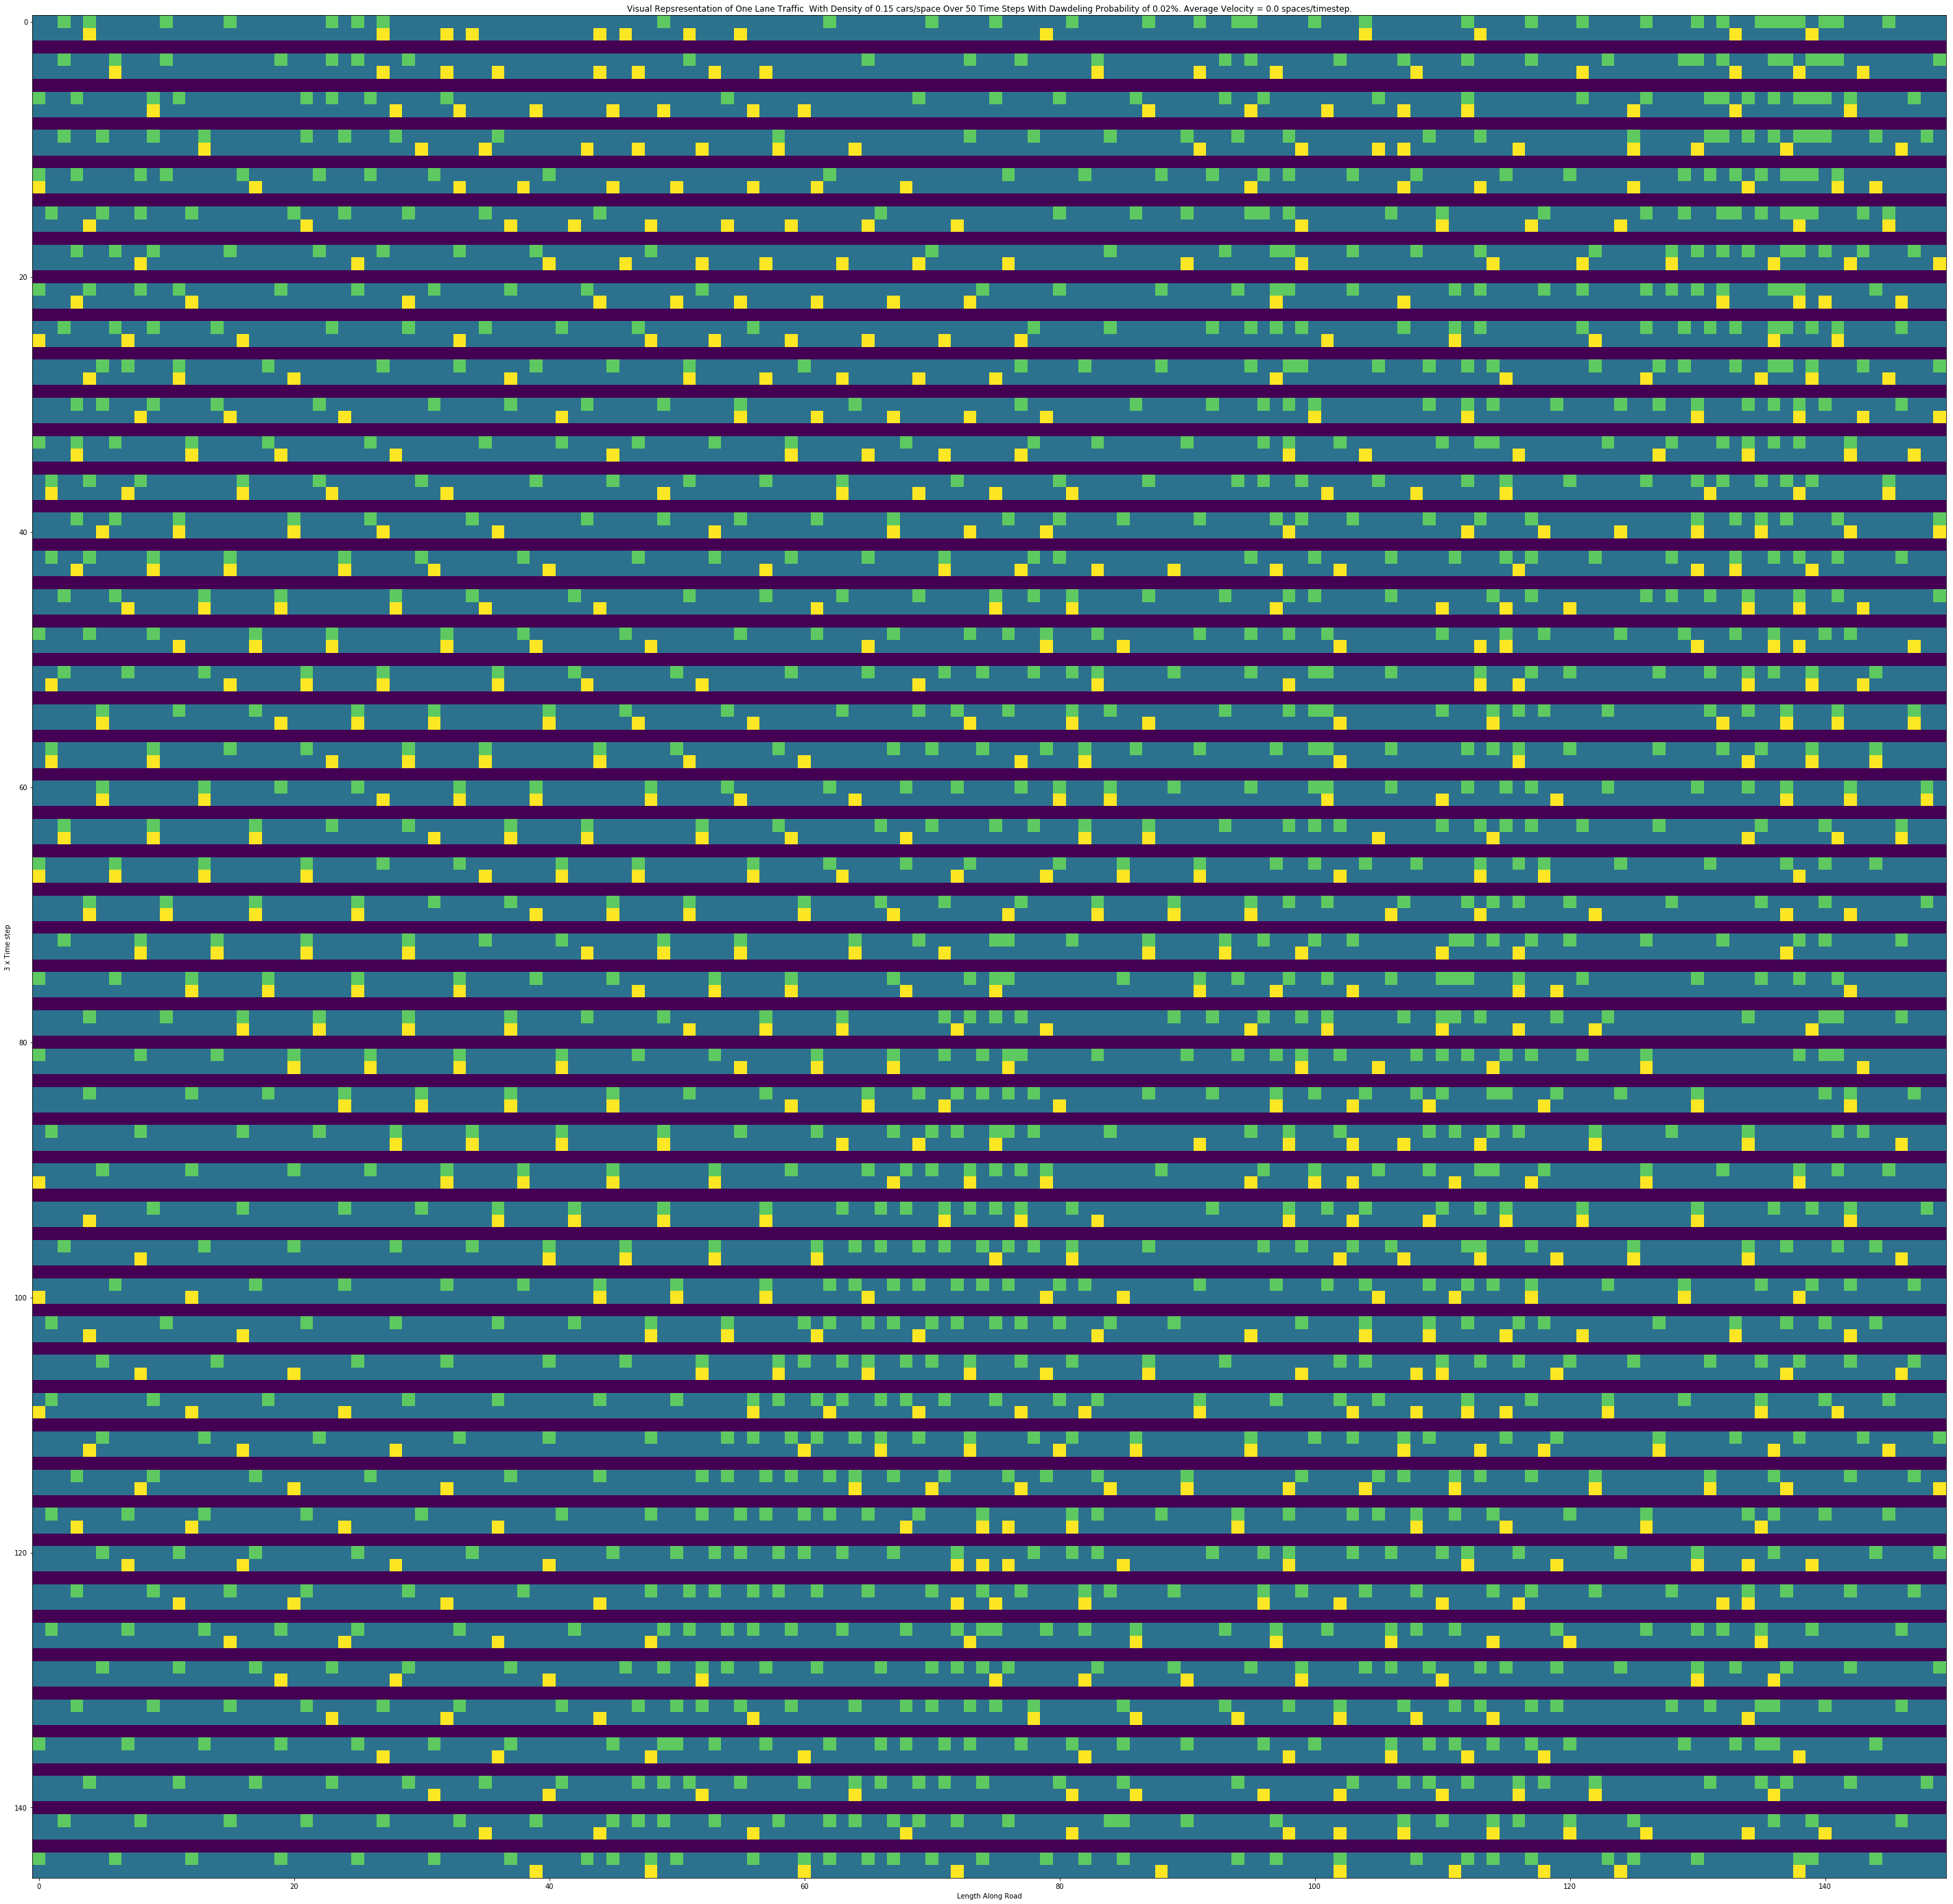

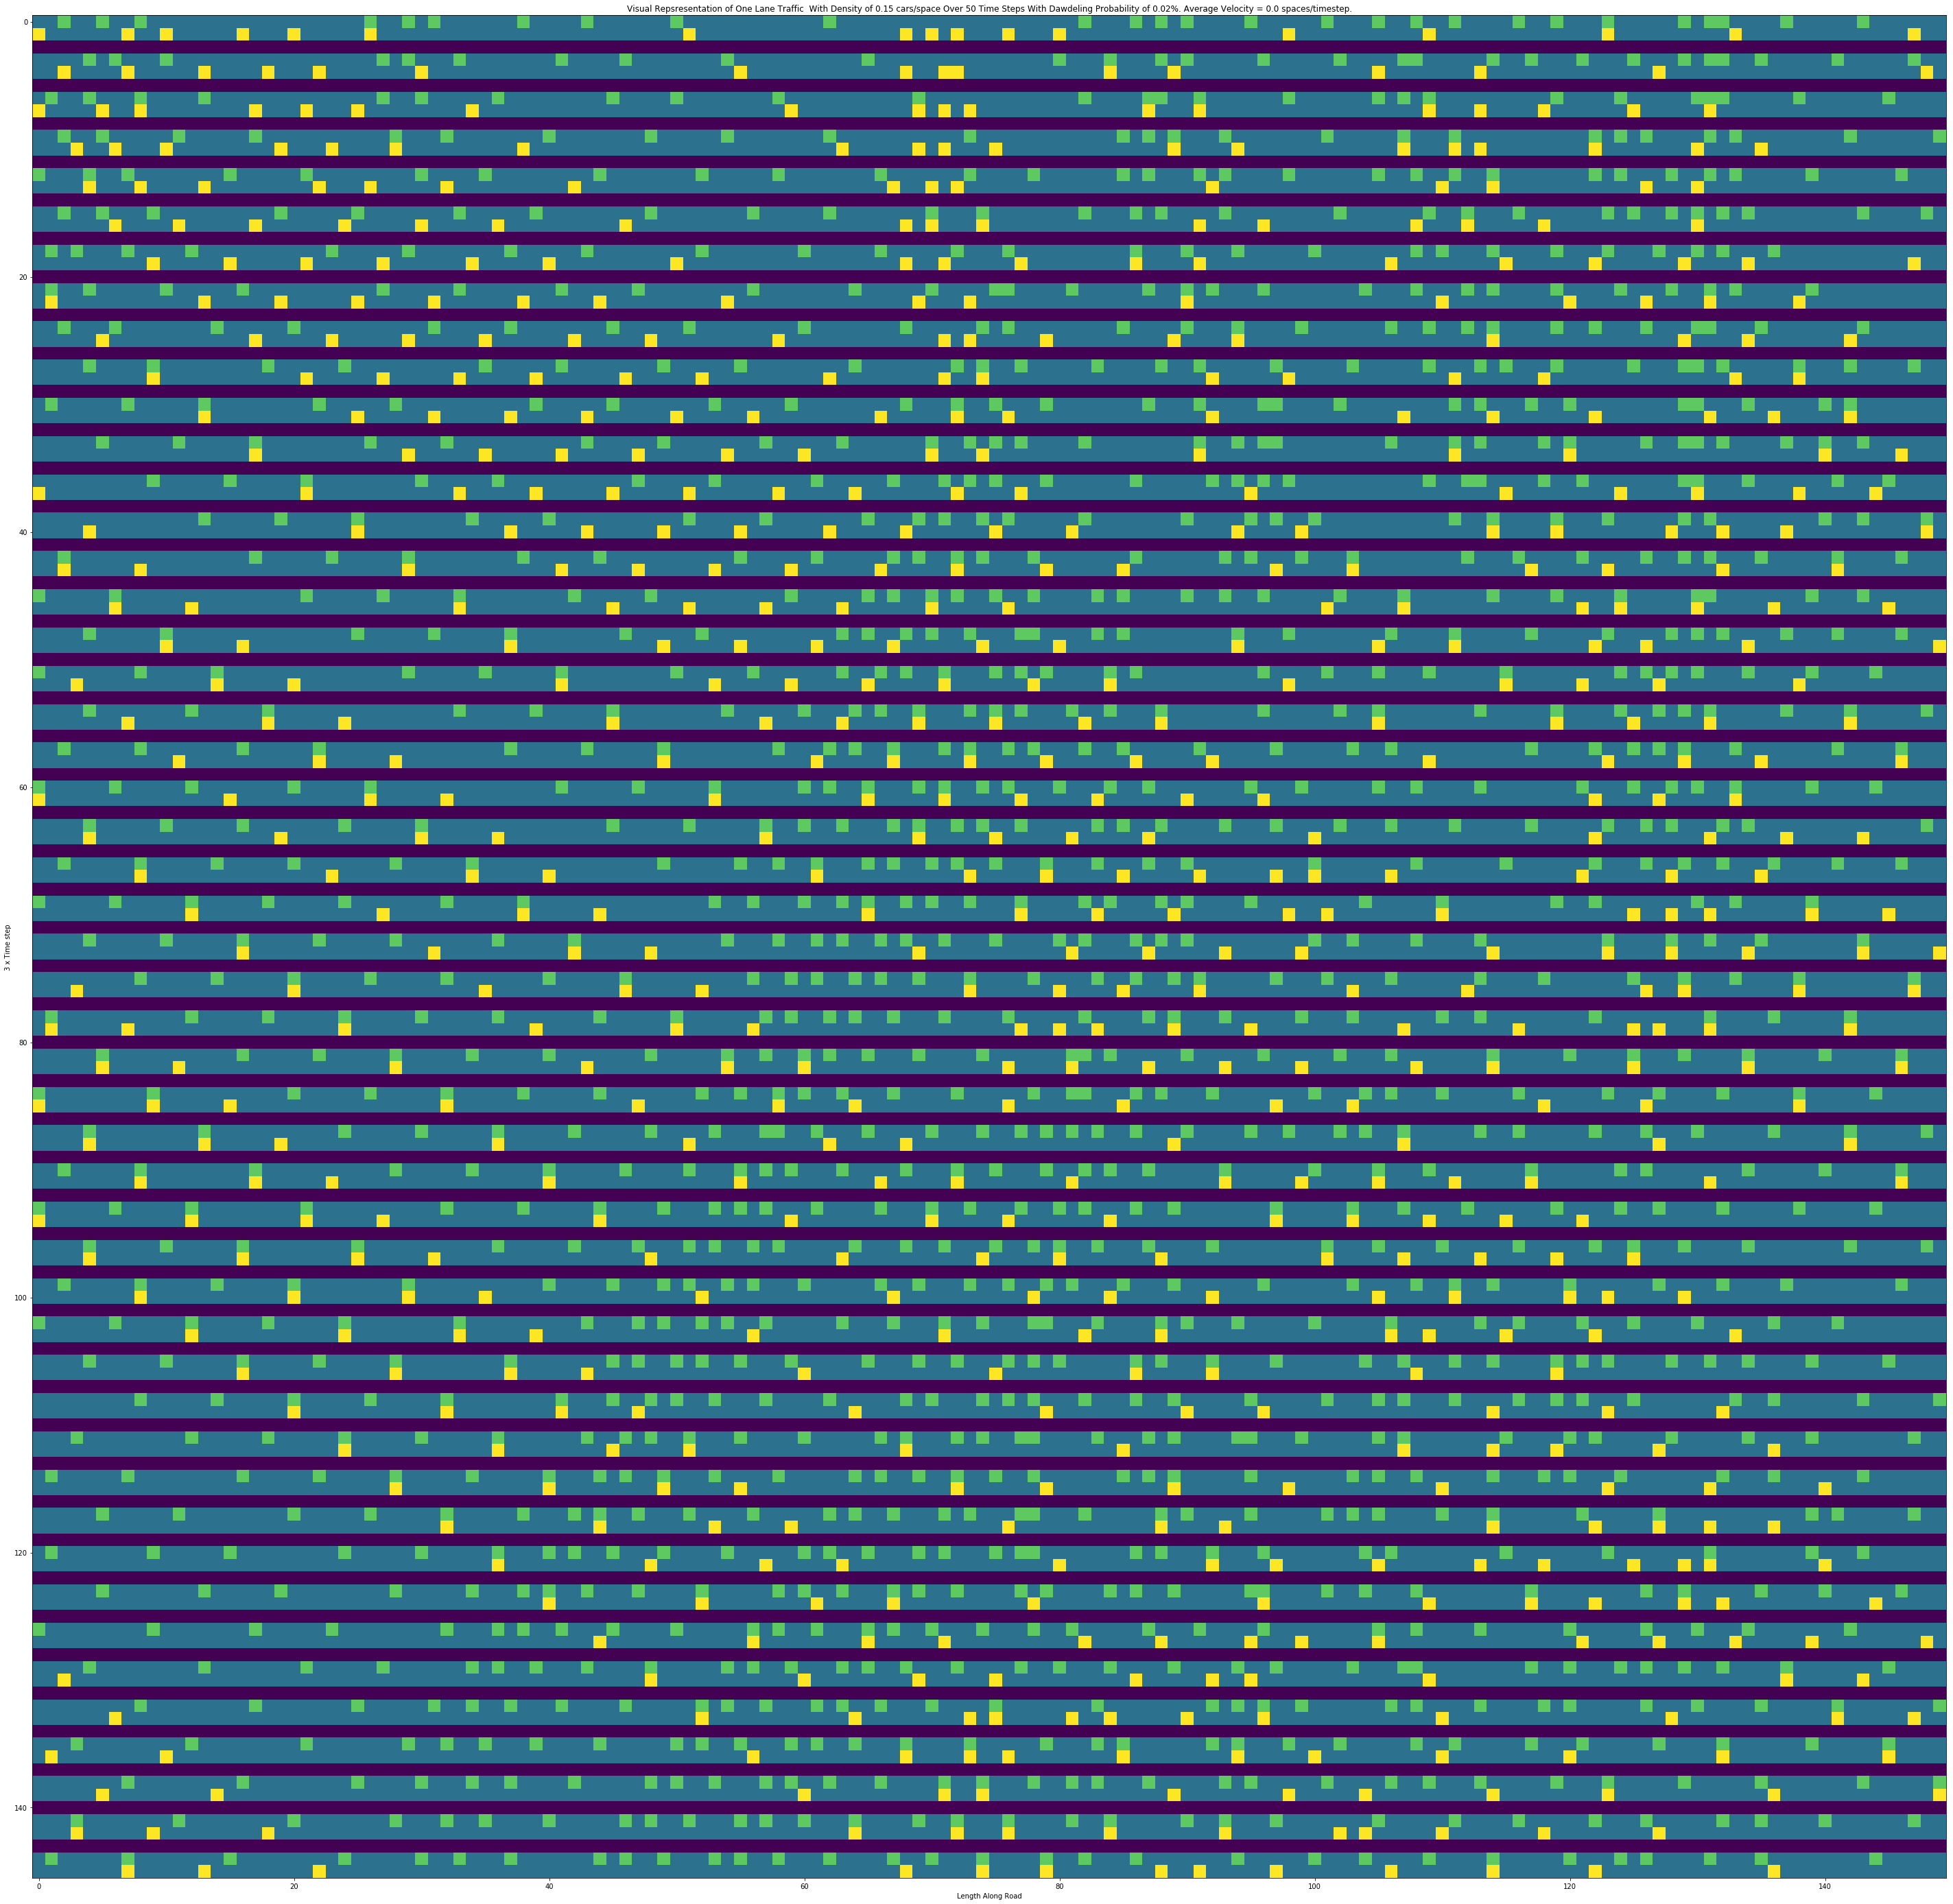

In [9]:
for i in range(10):
    dual_lane_road_periodic(150, 2, 6, 15/100,2/100, 50)

I then took to plotting the results and what can be seen is that in the slower lane, the build up of cars still takes place, but to not as much of an extent as in the single lane system. However the cars in the overtaking lane are either accelerating or moving at maximum velocity. due to this the cars in the slower lane are struggling to find the space to be able to overtake and free themselves from the traffic, thus it makes sense to extend this system to 3 lanes, allowing for move overatking freedom, and what one would expect to see is less traffic build up when the inital conditions  are similar.